<a href="https://colab.research.google.com/github/Suryanshsaraf/blank-app-template/blob/main/DWProjectFinal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import random

# Define the number of rows
num_rows = 10000

# Generate data
data = {
    "sl_no": range(1, num_rows + 1),
    "gender": [random.choice(['M', 'F']) for _ in range(num_rows)],
    "ssc_p": np.round(np.random.uniform(50, 100, num_rows), 2),
    "ssc_b": [random.choice(['Others', 'Central']) for _ in range(num_rows)],
    "hsc_p": np.round(np.random.uniform(50, 100, num_rows), 2),
    "hsc_b": [random.choice(['Others', 'Central']) for _ in range(num_rows)],
    "hsc_s": [random.choice(['Commerce', 'Science', 'Arts']) for _ in range(num_rows)],
    "degree_p": np.round(np.random.uniform(50, 100, num_rows), 2),
    "degree_t": [random.choice(['Sci&Tech', 'Comm&Mgmt', 'Arts']) for _ in range(num_rows)],
    "workex": [random.choice(['Yes', 'No']) for _ in range(num_rows)],
    "etest_p": np.round(np.random.uniform(50, 100, num_rows), 2),
    "specialisation": [random.choice(['Mkt&Fin', 'Mkt&HR']) for _ in range(num_rows)],
    "mba_p": np.round(np.random.uniform(50, 100, num_rows), 2),
    "status": [random.choice(['Placed', 'Not Placed']) for _ in range(num_rows)],
    "salary": [random.choice([np.nan, int(np.random.uniform(200000, 500000))]) if status == 'Placed' else np.nan
               for status in [random.choice(['Placed', 'Not Placed']) for _ in range(num_rows)]]
}

# Create DataFrame
df = pd.DataFrame(data)

# Save to Excel file
df.to_excel("synthetic_dataset.xlsx", index=False)

print("Excel dataset generated and saved as 'synthetic_dataset.xlsx'.")


Excel dataset generated and saved as 'synthetic_dataset.xlsx'.


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
%matplotlib inline

#Loading the single csv file to a variable named 'placement'
placement=pd.read_csv("/content/updated_dataset1.csv")

placement_copy=placement.copy()
placement_copy.head()

FileNotFoundError: [Errno 2] No such file or directory: '/content/updated_dataset1.csv'

In [ ]:
print ("The shape of the  data is (row, column):"+ str(placement.shape))
print (placement_copy.info())

The shape of the  data is (row, column):(10000, 16)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   sl_no           10000 non-null  int64  
 1   gender          10000 non-null  object 
 2   ssc_p           10000 non-null  float64
 3   ssc_b           10000 non-null  object 
 4   hsc_p           10000 non-null  float64
 5   hsc_b           10000 non-null  object 
 6   hsc_s           10000 non-null  object 
 7   degree_p        10000 non-null  float64
 8   degree_t        10000 non-null  object 
 9   workex          10000 non-null  object 
 10  etest_p         10000 non-null  float64
 11  specialisation  10000 non-null  object 
 12  mba_p           10000 non-null  float64
 13  status          10000 non-null  object 
 14  salary          10000 non-null  float64
 15  Placed          10000 non-null  object 
dtypes: float64(6), int64(1), 

In [ ]:

print('Data columns with null values:',placement_copy.isnull().sum(), sep = '\n')

Data columns with null values:
sl_no             0
gender            0
ssc_p             0
ssc_b             0
hsc_p             0
hsc_b             0
hsc_s             0
degree_p          0
degree_t          0
workex            0
etest_p           0
specialisation    0
mba_p             0
status            0
salary            0
Placed            0
dtype: int64


In [ ]:
placement_copy['salary'].fillna(value=0, inplace=True)
print('Salary column with null values:',placement_copy['salary'].isnull().sum(), sep = '\n')

Salary column with null values:
0


<ipython-input-7-6422c8715e76>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  placement_copy['salary'].fillna(value=0, inplace=True)


In [ ]:

placement_copy.drop(['sl_no','ssc_b','hsc_b'], axis = 1,inplace=True)
placement_copy.head()

,gender,ssc_p,hsc_p,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary,Placed
0,M,70.56,81.61,Science,84.69,Arts,Yes,79.92,Mkt&Fin,91.65,Placed,349749.259824,Yes
1,F,78.79,80.89,Arts,58.62,Arts,No,88.71,Mkt&Fin,73.51,Not Placed,349749.259824,No
2,F,94.44,63.19,Arts,88.75,Comm&Mgmt,Yes,57.47,Mkt&HR,86.03,Placed,349749.259824,Yes
3,M,60.32,98.12,Commerce,79.63,Sci&Tech,No,94.64,Mkt&Fin,69.14,Placed,349749.259824,Yes
4,F,56.47,54.63,Science,90.22,Arts,No,53.16,Mkt&HR,89.37,Not Placed,251995.000000,No


Text(0.5, 1.0, 'Employability percentage')

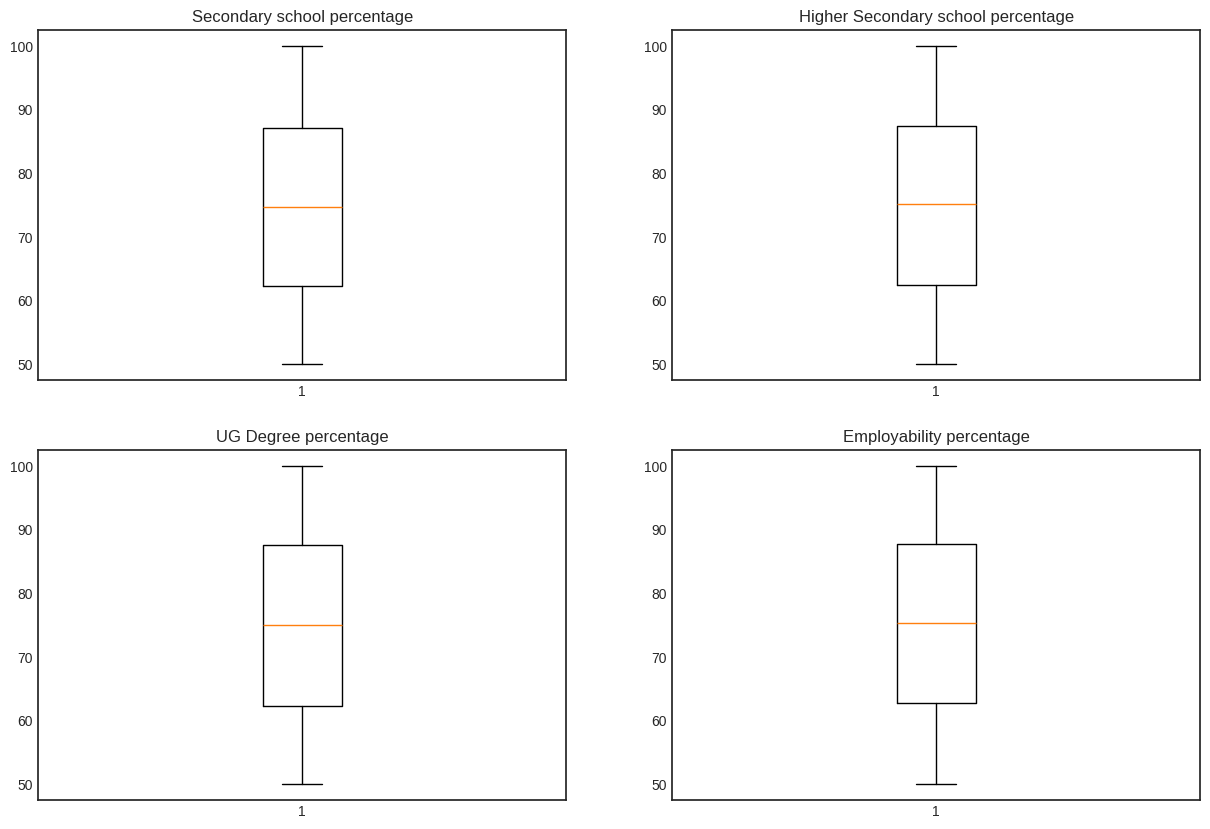

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize = (15, 10))
# Use the updated seaborn style name
plt.style.use('seaborn-v0_8-white')
ax=plt.subplot(221)
plt.boxplot(placement_copy['ssc_p'])
ax.set_title('Secondary school percentage')
ax=plt.subplot(222)
plt.boxplot(placement_copy['hsc_p'])
ax.set_title('Higher Secondary school percentage')
ax=plt.subplot(223)
plt.boxplot(placement_copy['degree_p'])
ax.set_title('UG Degree percentage')
ax=plt.subplot(224)
plt.boxplot(placement_copy['etest_p'])
ax.set_title('Employability percentage')

<ipython-input-11-ce2779084c9e>:14: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(),fontsize=12)
<ipython-input-11-ce2779084c9e>:22: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(),fontsize=12)
<ipython-input-11-ce2779084c9e>:30: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(),fontsize=12,rotation=20)
<ipython-input-11-ce2779084c9e>:38: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(),fontsize=12)
<ipython-input-11-ce2779084c9e>:46: UserWarning: set_ticklabels() should only be used with a fixed number of tic

[Text(0, 0, 'Placed'), Text(1, 0, 'Not Placed')]

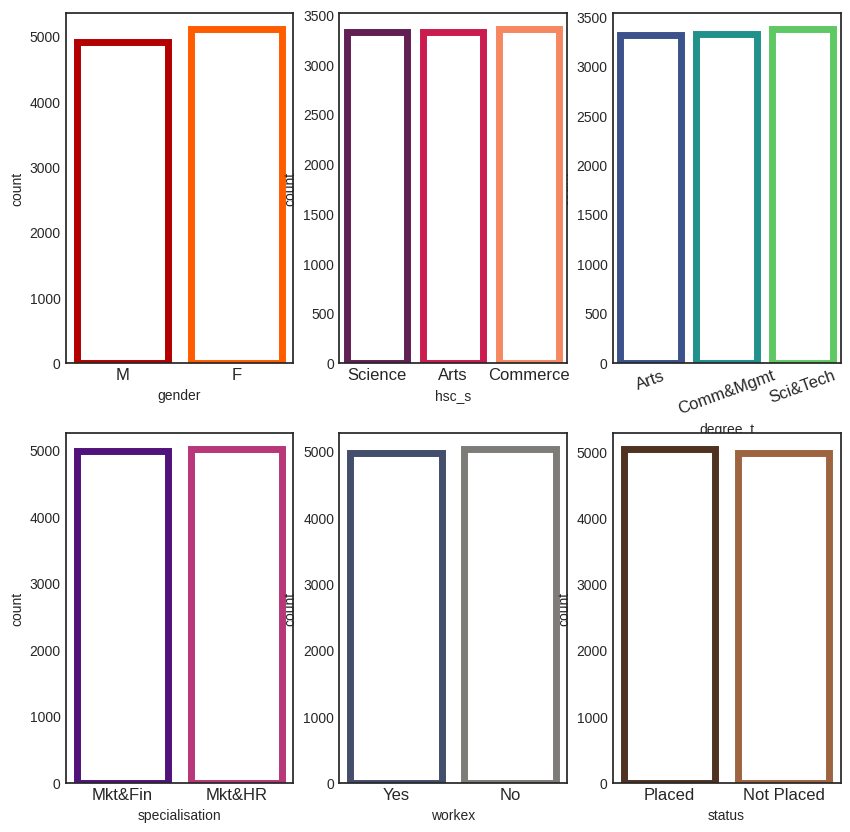

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns  # Import seaborn

plt.figure(figsize = (15, 7))
# Use the updated seaborn style name
plt.style.use('seaborn-v0_8-white')

#Specialisation
plt.subplot(234)
ax=sns.countplot(x="specialisation", data=placement_filtered, facecolor=(0, 0, 0, 0),
                 linewidth=5,edgecolor=sns.color_palette("magma", 3))
fig = plt.gcf()
fig.set_size_inches(10,10)
ax.set_xticklabels(ax.get_xticklabels(),fontsize=12)

#Work experience
plt.subplot(235)
ax=sns.countplot(x="workex", data=placement_filtered, facecolor=(0, 0, 0, 0),
                 linewidth=5,edgecolor=sns.color_palette("cividis", 3))
fig = plt.gcf()
fig.set_size_inches(10,10)
ax.set_xticklabels(ax.get_xticklabels(),fontsize=12)

#Degree type
plt.subplot(233)
ax=sns.countplot(x="degree_t", data=placement_filtered, facecolor=(0, 0, 0, 0),
                 linewidth=5,edgecolor=sns.color_palette("viridis", 3))
fig = plt.gcf()
fig.set_size_inches(10,10)
ax.set_xticklabels(ax.get_xticklabels(),fontsize=12,rotation=20)

#Gender
plt.subplot(231)
ax=sns.countplot(x="gender", data=placement_filtered, facecolor=(0, 0, 0, 0),
                 linewidth=5,edgecolor=sns.color_palette("hot", 3))
fig = plt.gcf()
fig.set_size_inches(10,10)
ax.set_xticklabels(ax.get_xticklabels(),fontsize=12)

#Higher secondary specialisation
plt.subplot(232)
ax=sns.countplot(x="hsc_s", data=placement_filtered, facecolor=(0, 0, 0, 0),
                 linewidth=5,edgecolor=sns.color_palette("rocket", 3))
fig = plt.gcf()
fig.set_size_inches(10,10)
ax.set_xticklabels(ax.get_xticklabels(),fontsize=12)

#Status of recruitment
plt.subplot(236)
ax=sns.countplot(x="status", data=placement_filtered, facecolor=(0, 0, 0, 0),
                 linewidth=5,edgecolor=sns.color_palette("copper", 3))
fig = plt.gcf()
fig.set_size_inches(10,10)
ax.set_xticklabels(ax.get_xticklabels(),fontsize=12)

<ipython-input-12-be6209640de0>:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(placement_placed["salary"], ax=ax_hist)


[Text(0.5, 0, '')]

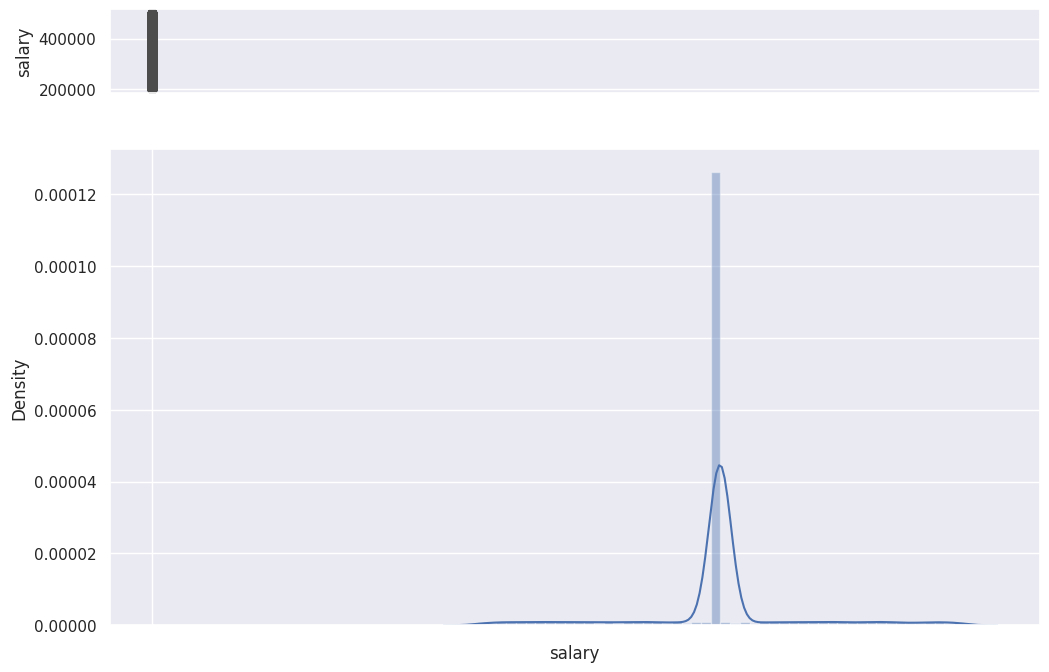

In [ ]:
sns.set(rc={'figure.figsize':(12,8)})
f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.15, .85)})

placement_placed = placement_filtered[placement_filtered.salary != 0]
sns.boxplot(placement_placed["salary"], ax=ax_box)
sns.distplot(placement_placed["salary"], ax=ax_hist)

# Remove x axis name for the boxplot
ax_box.set(xlabel='')

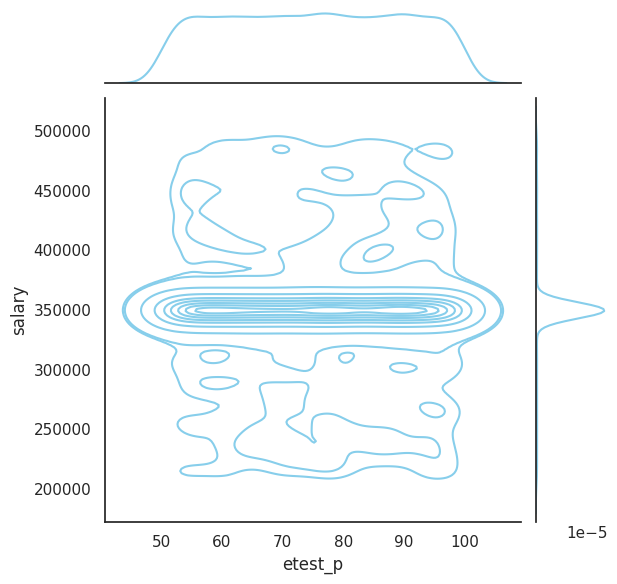

In [ ]:
sns.set(rc={'figure.figsize':(12,8)})
sns.set(style="white", color_codes=True)
sns.jointplot(x=placement_filtered["etest_p"], y=placement_filtered["salary"], kind='kde', color="skyblue")

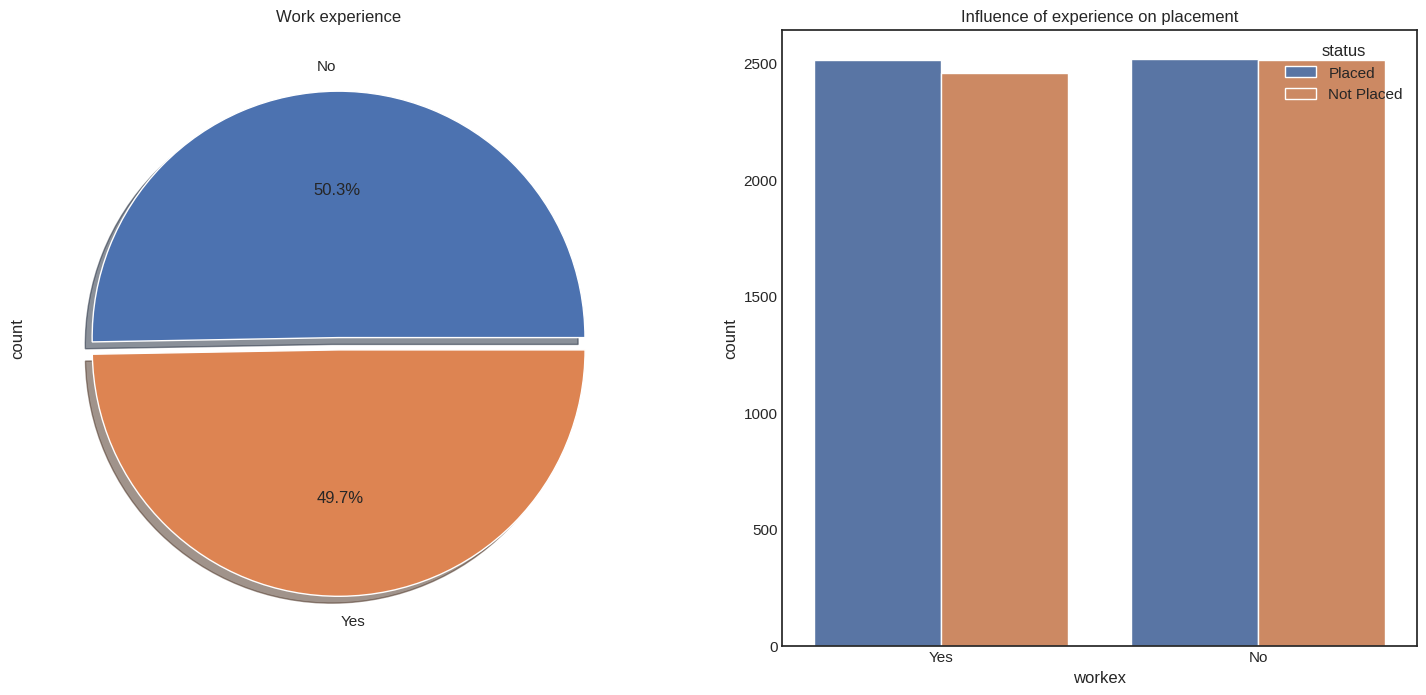

In [ ]:
#Code forked from-https://www.kaggle.com/biphili/hospitality-in-era-of-airbnb
# Use the updated seaborn style name
plt.style.use('seaborn-v0_8-white')
f,ax=plt.subplots(1,2,figsize=(18,8))
placement_filtered['workex'].value_counts().plot.pie(explode=[0,0.05],autopct='%1.1f%%',ax=ax[0],shadow=True)
ax[0].set_title('Work experience')
sns.countplot(x = 'workex',hue = "status",data = placement_filtered)
ax[1].set_title('Influence of experience on placement')
plt.show()

In [ ]:
dummy_hsc_s=pd.get_dummies(placement_filtered['hsc_s'], prefix='dummy')
dummy_degree_t=pd.get_dummies(placement_filtered['degree_t'], prefix='dummy')
placement_coded = pd.concat([placement_filtered,dummy_hsc_s,dummy_degree_t],axis=1)
placement_coded.drop(['hsc_s','degree_t','salary'],axis=1, inplace=True)
placement_coded.head()

,gender,ssc_p,hsc_p,degree_p,workex,etest_p,specialisation,mba_p,status,dummy_Arts,dummy_Commerce,dummy_Science,dummy_Arts,dummy_Comm&Mgmt,dummy_Sci&Tech
0,1,70.56,81.61,84.69,1,79.92,0,91.65,1,False,False,True,True,False,False
1,0,78.79,80.89,58.62,0,88.71,0,73.51,0,True,False,False,True,False,False
2,0,94.44,63.19,88.75,1,57.47,1,86.03,1,True,False,False,False,True,False
3,1,60.32,98.12,79.63,0,94.64,0,69.14,1,False,True,False,False,False,True
4,0,56.47,54.63,90.22,0,53.16,1,89.37,0,False,False,True,True,False,False


In [ ]:
feature_cols=['gender','ssc_p','hsc_p','hsc_p','workex','etest_p','specialisation','mba_p',
              'dummy_Arts','dummy_Commerce','dummy_Science','dummy_Comm&Mgmt','dummy_Others','dummy_Sci&Tech']
len(feature_cols)

14

In [ ]:
pip install pydotplus

Text(0.5, 1.0, 'Visualizing Important Features')

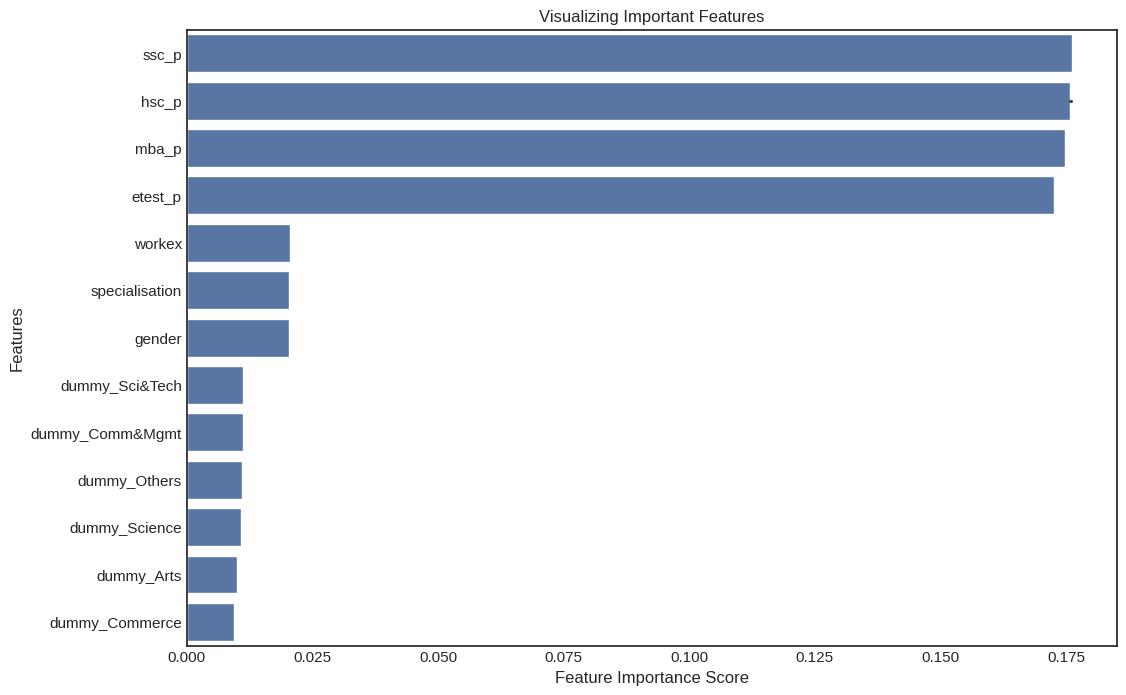

In [ ]:
feature_imp = pd.Series(rt.feature_importances_,index=feature_cols).sort_values(ascending=False)
# Creating a bar plot
sns.barplot(x=feature_imp, y=feature_imp.index)
# Add labels to your graph
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")

In [ ]:
import pandas as pd

# Load the dataset
df = pd.read_csv('/content/updated_dataset1 (1).csv')

# Randomly sample 70% of rows for 'Central' in 'ssc_b'
df_sampled = df.sample(frac=0.7, replace=False)

# Oversample 'Science' in 'hsc_s'
df_oversampled = pd.concat([df, df[df['hsc_s'] == 'Science']])

# Undersample 'Arts' in 'degree_t'
df_undersampled = df.drop(df[df['degree_t'] == 'Arts'].sample(frac=0.5).index)

# Combine the modified DataFrames
df_modified = pd.concat([df_sampled, df_oversampled, df_undersampled])

# Save the modified DataFrame to a new CSV file
df_modified.to_csv('modified_dataset.csv', index=False)

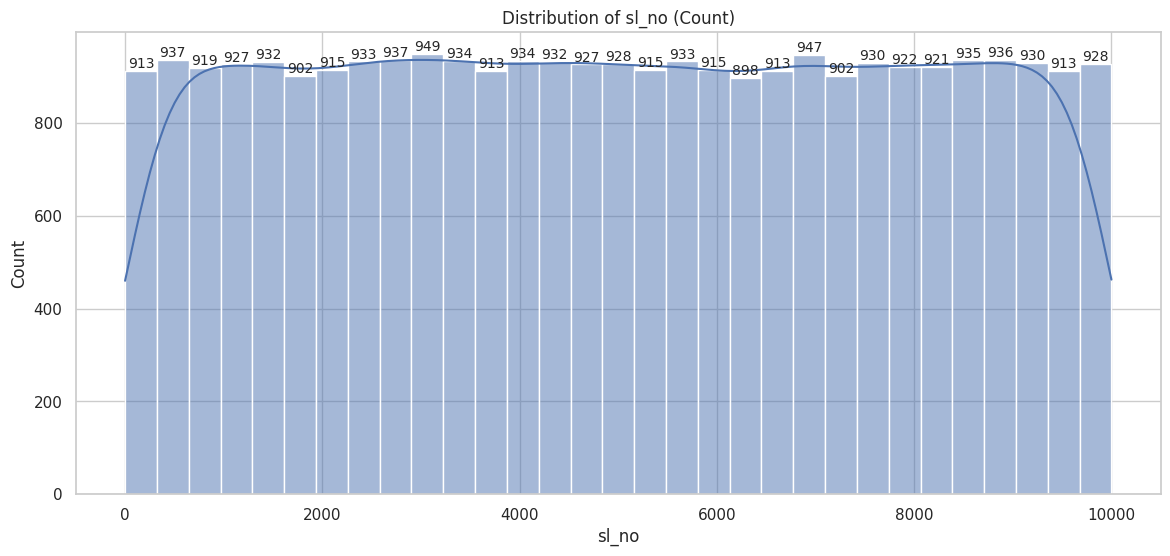

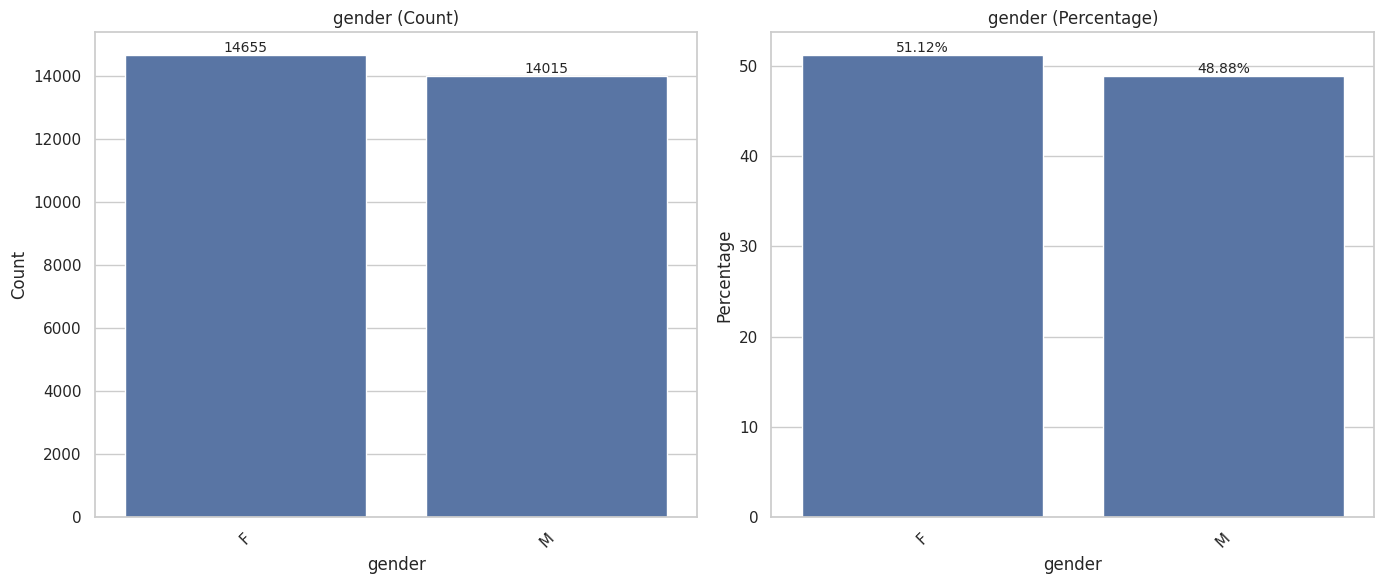

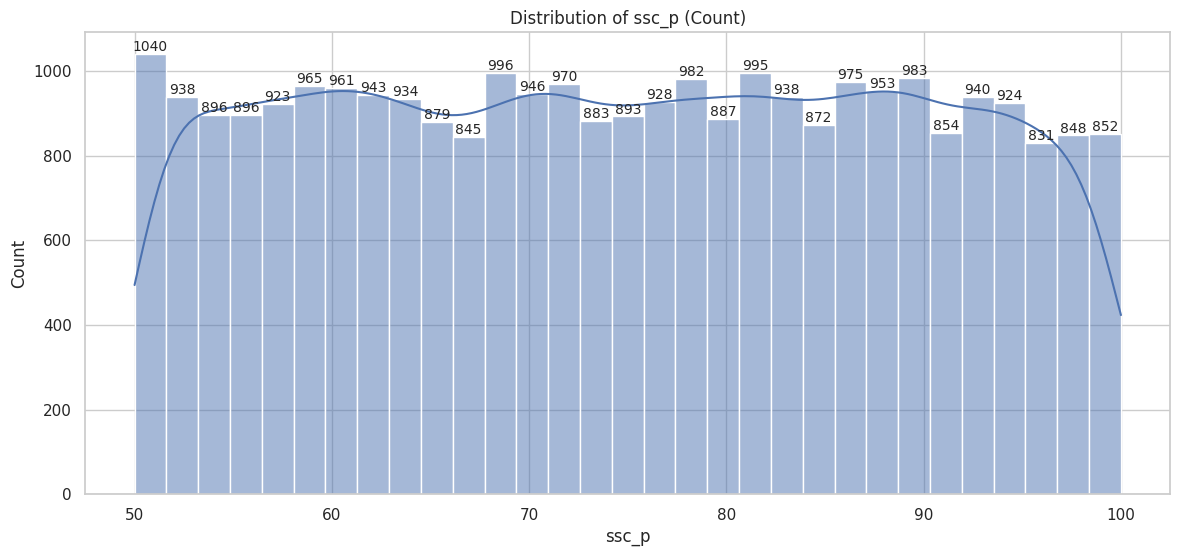

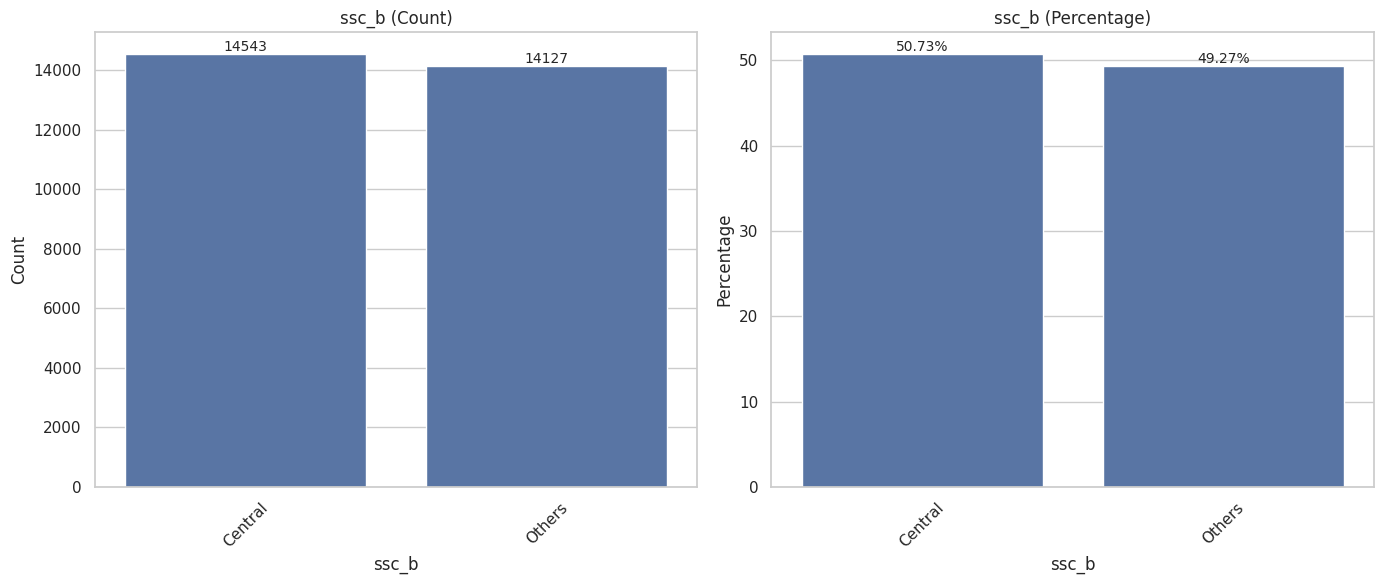

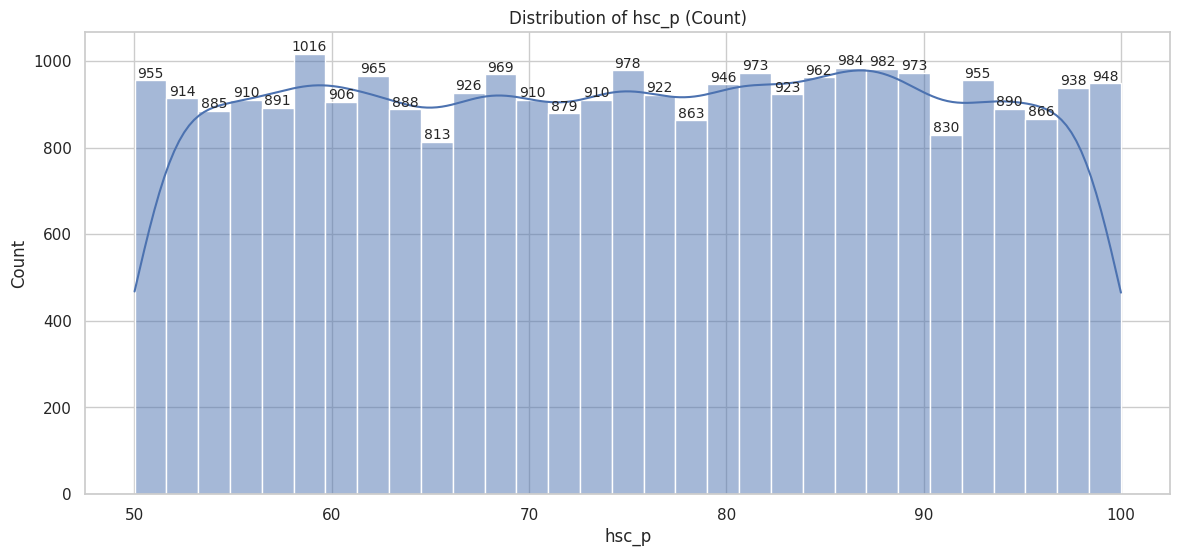

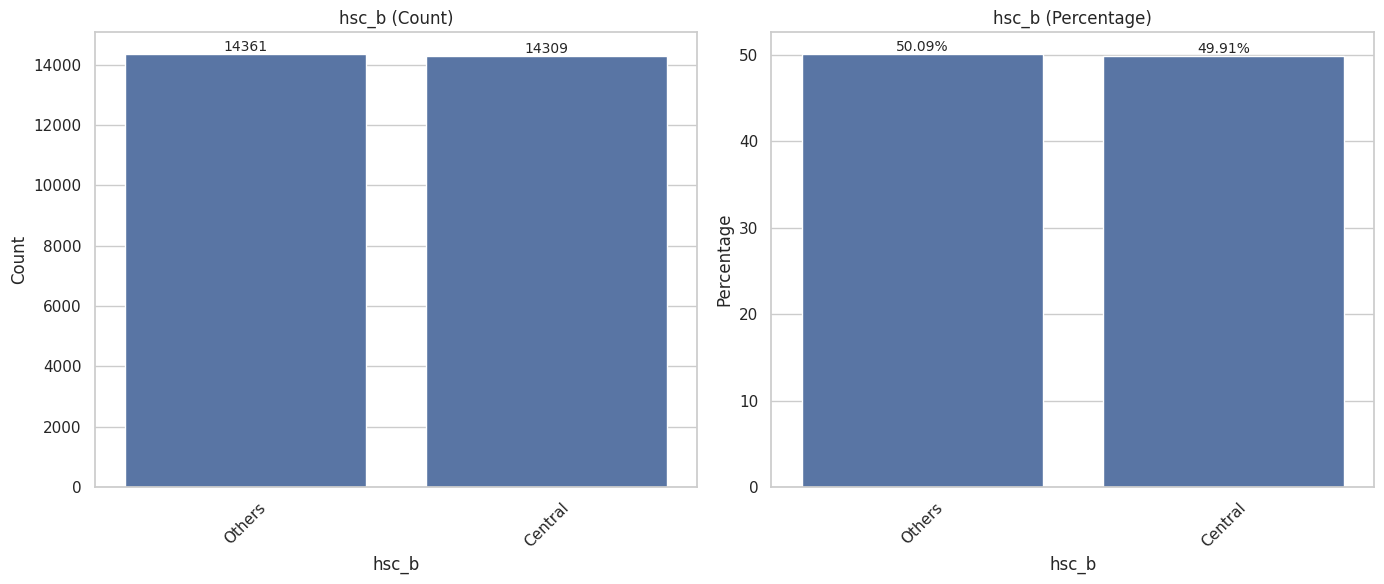

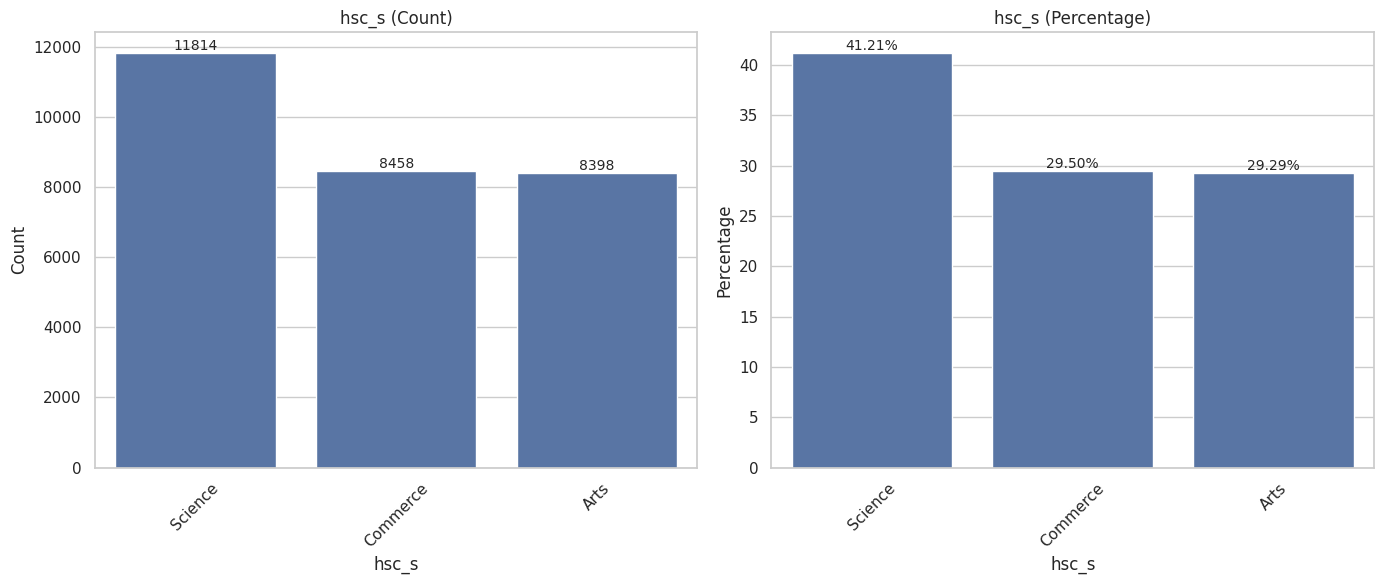

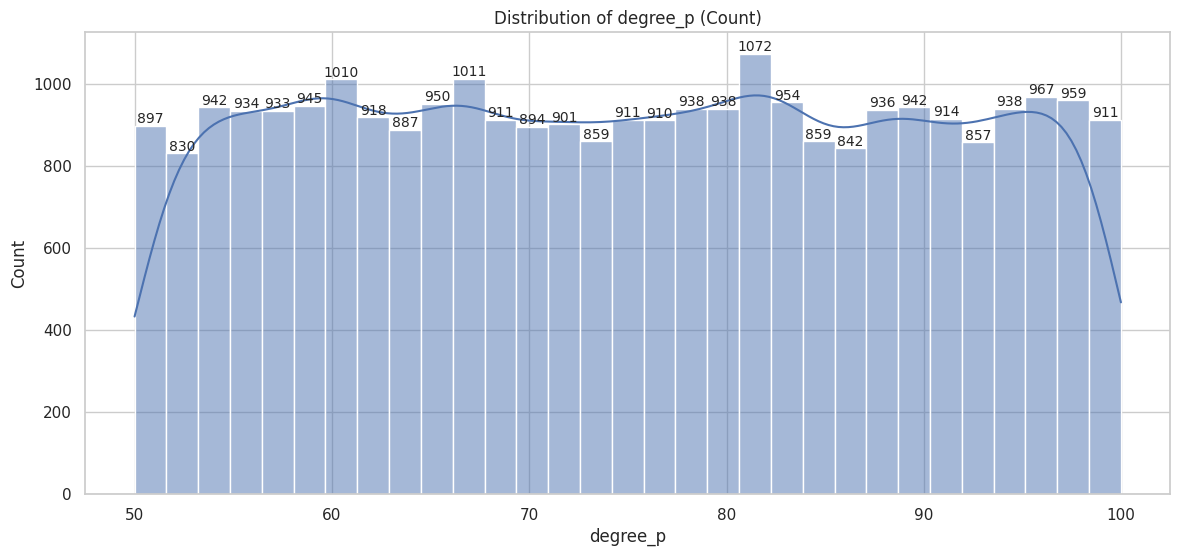

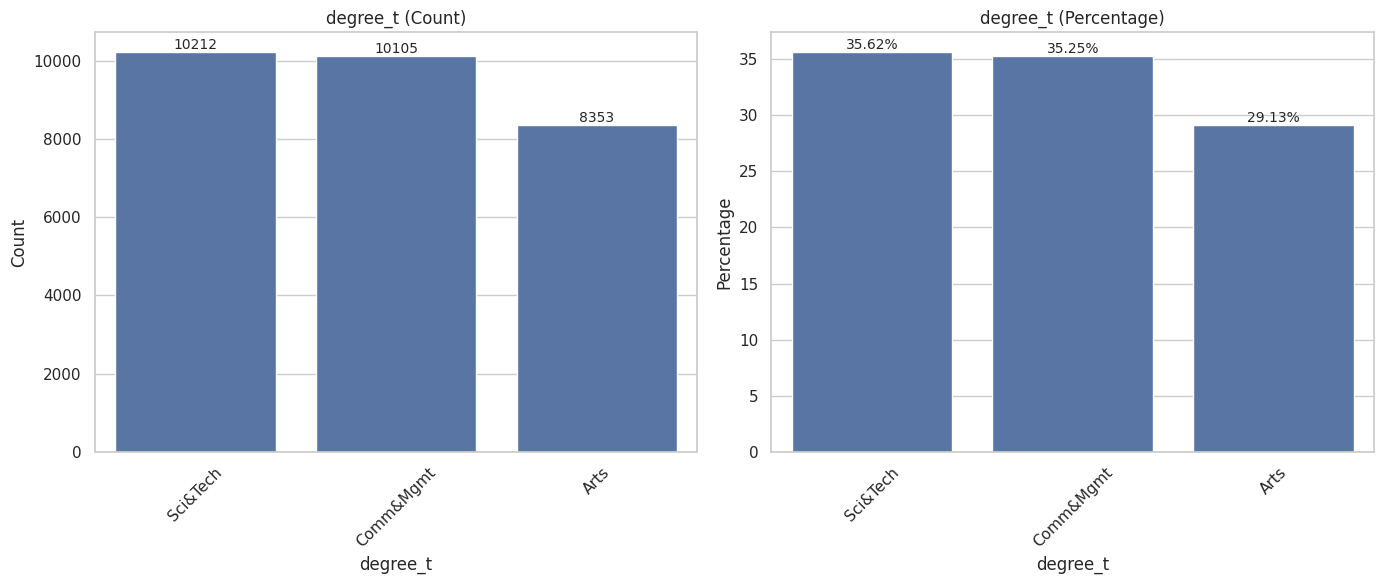

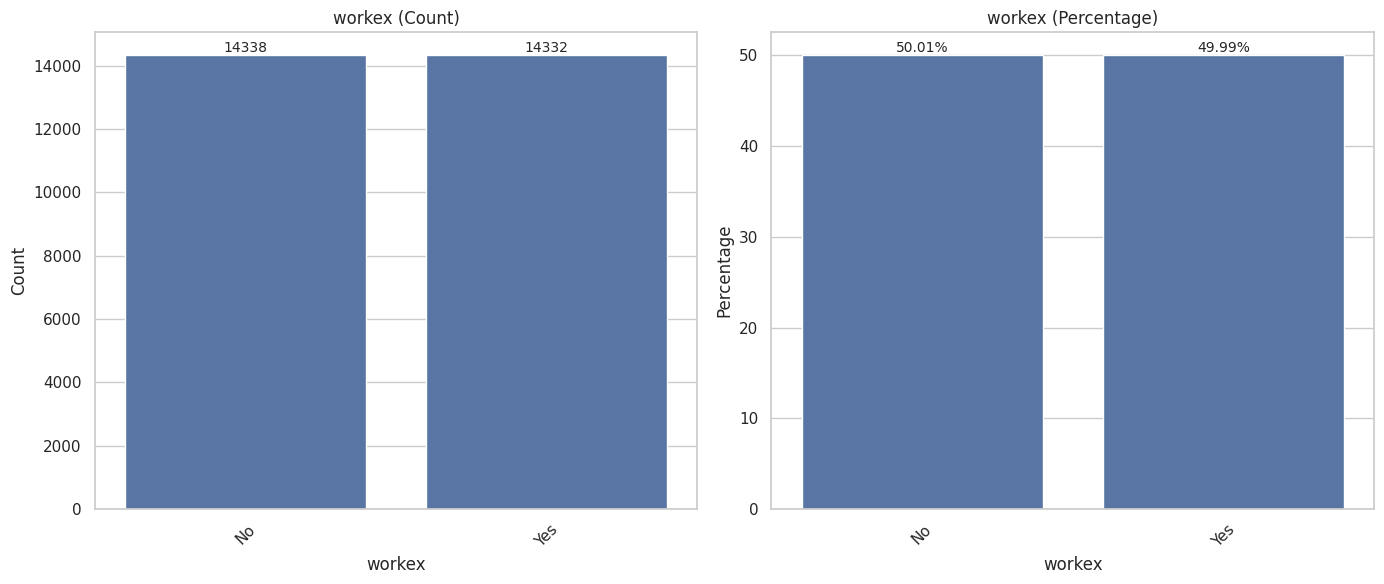

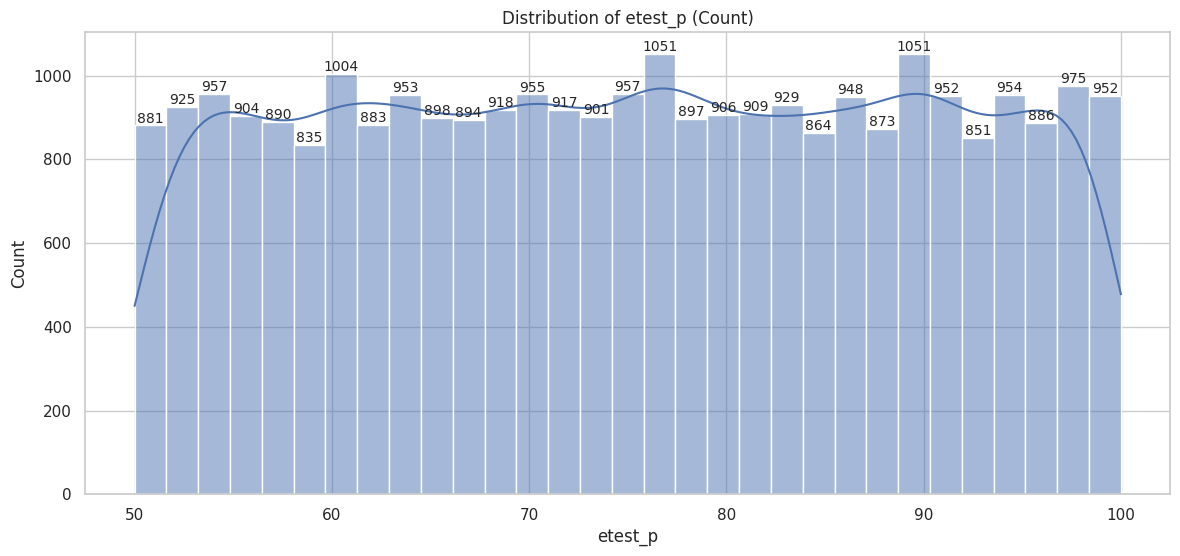

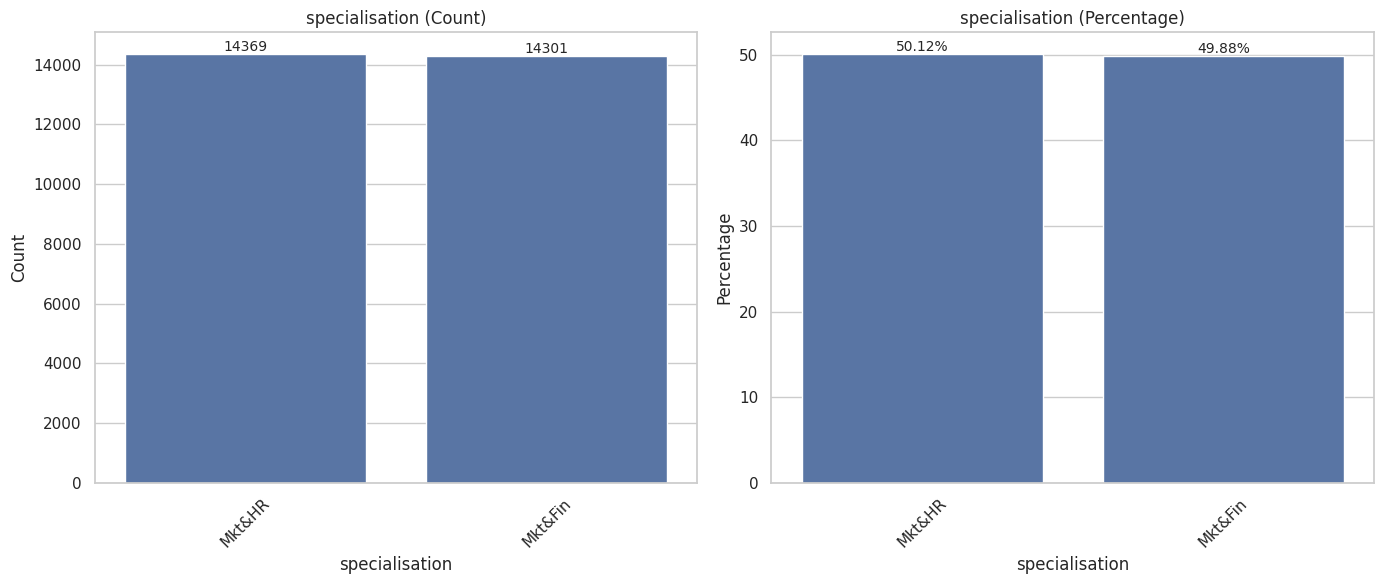

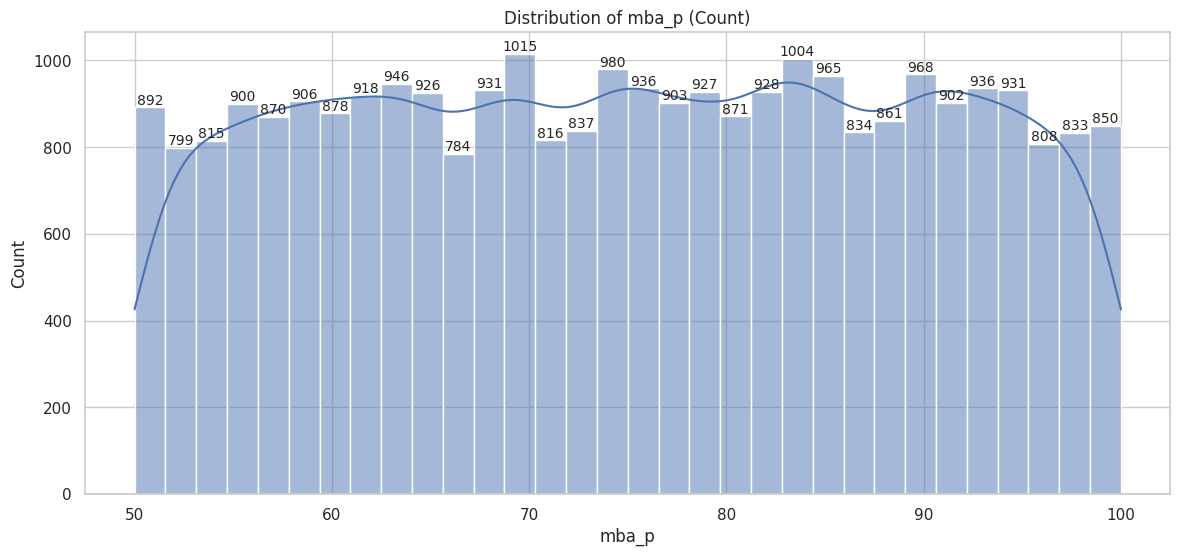

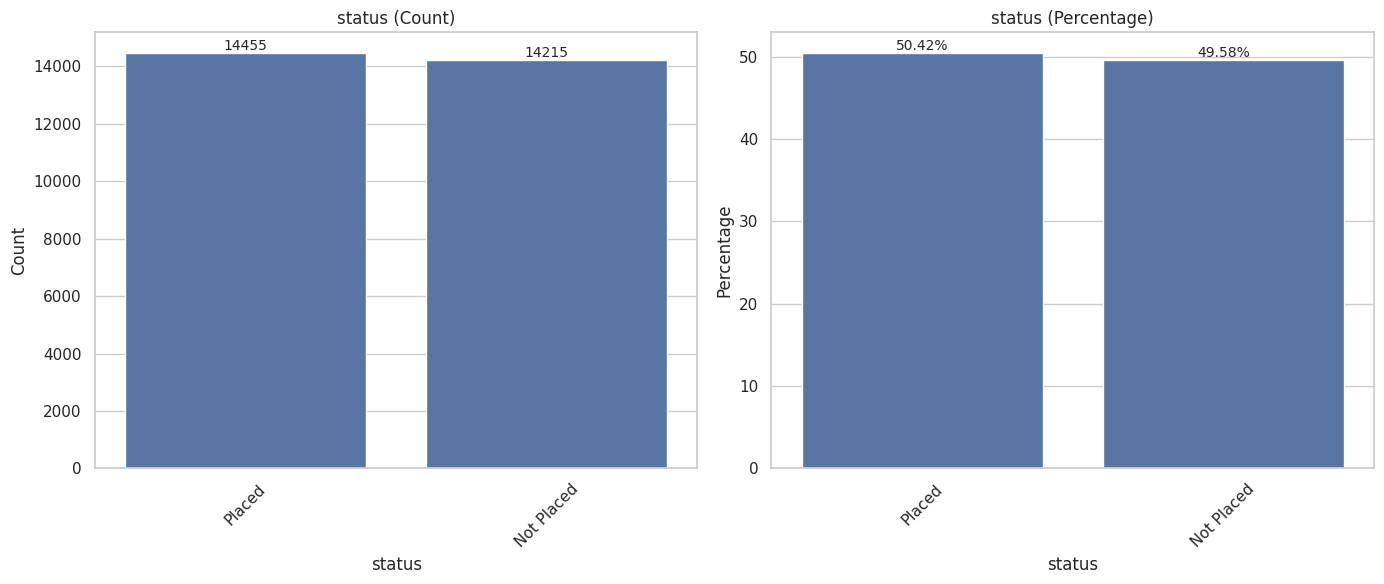

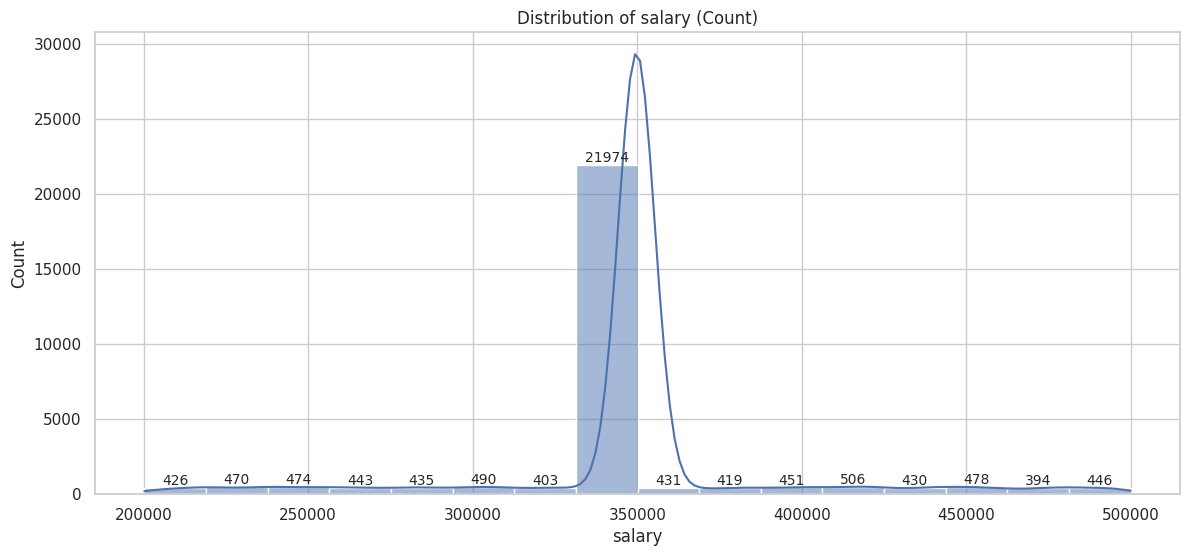

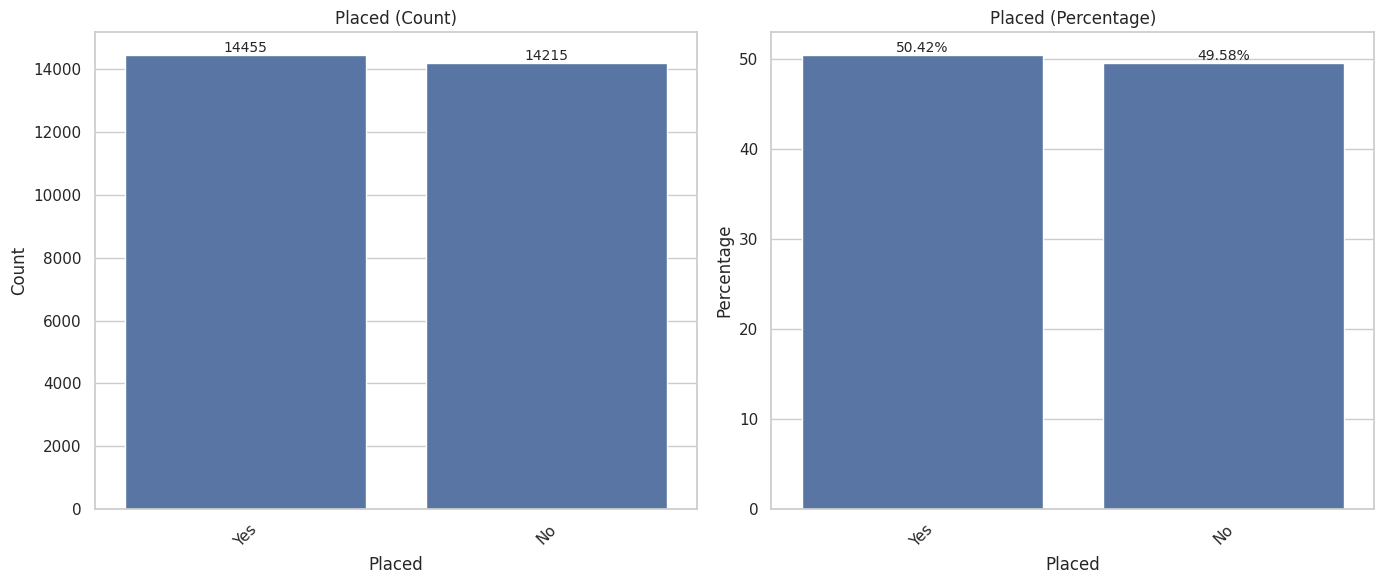

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
file_path = '/content/modified_dataset.csv'  # Replace with your actual file path
data = pd.read_csv(file_path)

# Set the plot style
sns.set(style="whitegrid")

# Iterate over each column in the dataset
for col in data.columns:
    plt.figure(figsize=(14, 6))

    # Check if the column is numeric
    if data[col].dtype in ['float64', 'int64']:
        # Numeric columns: plot histogram for counts
        plot = sns.histplot(data[col], kde=True)
        plt.title(f'Distribution of {col} (Count)')
        plt.xlabel(col)
        plt.ylabel('Count')

        # Annotate bars with counts
        for p in plot.patches:
            height = p.get_height()
            if height > 0:
                plt.annotate(f'{int(height)}',
                             (p.get_x() + p.get_width() / 2, height),
                             ha='center', va='bottom', fontsize=10)

        plt.show()

    else:
        # Categorical columns: plot bar chart for count and percentage
        count_values = data[col].value_counts()
        percentage_values = data[col].value_counts(normalize=True) * 100

        # Plot counts
        plt.subplot(1, 2, 1)
        count_plot = sns.barplot(x=count_values.index, y=count_values.values)
        plt.title(f'{col} (Count)')
        plt.xlabel(col)
        plt.ylabel('Count')
        plt.xticks(rotation=45)

        # Annotate bars with count values
        for p in count_plot.patches:
            count = int(p.get_height())
            count_plot.annotate(f'{count}',
                                (p.get_x() + p.get_width() / 2, count),
                                ha='center', va='bottom', fontsize=10)

        # Plot percentages
        plt.subplot(1, 2, 2)
        percent_plot = sns.barplot(x=percentage_values.index, y=percentage_values.values)
        plt.title(f'{col} (Percentage)')
        plt.xlabel(col)
        plt.ylabel('Percentage')
        plt.xticks(rotation=45)

        # Annotate bars with percentage values
        for p in percent_plot.patches:
            percent = f'{p.get_height():.2f}%'
            percent_plot.annotate(percent,
                                  (p.get_x() + p.get_width() / 2, p.get_height()),
                                  ha='center', va='bottom', fontsize=10)

        plt.tight_layout()
        plt.show()



Analysis for column: sl_no
Binned range | Count | Average Salary
(-8.999, 1000.9] | 2859 | 348474.65
(1000.9, 2000.8] | 2841 | 348289.73
(2000.8, 3000.7] | 2895 | 349453.78
(3000.7, 4000.6] | 2889 | 352398.53
(4000.6, 5000.5] | 2885 | 349642.34
(5000.5, 6000.4] | 2857 | 350953.32
(6000.4, 7000.3] | 2843 | 346993.28
(7000.3, 8000.2] | 2858 | 351569.88
(8000.2, 9000.1] | 2875 | 349245.82
(9000.1, 10000.0] | 2868 | 350524.99


<ipython-input-4-db83edf1a2d9>:21: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  salary_data = data.groupby(f'{col}_binned')['salary'].mean()  # Changed 'Salary' to 'salary'


<Figure size 1000x600 with 0 Axes>

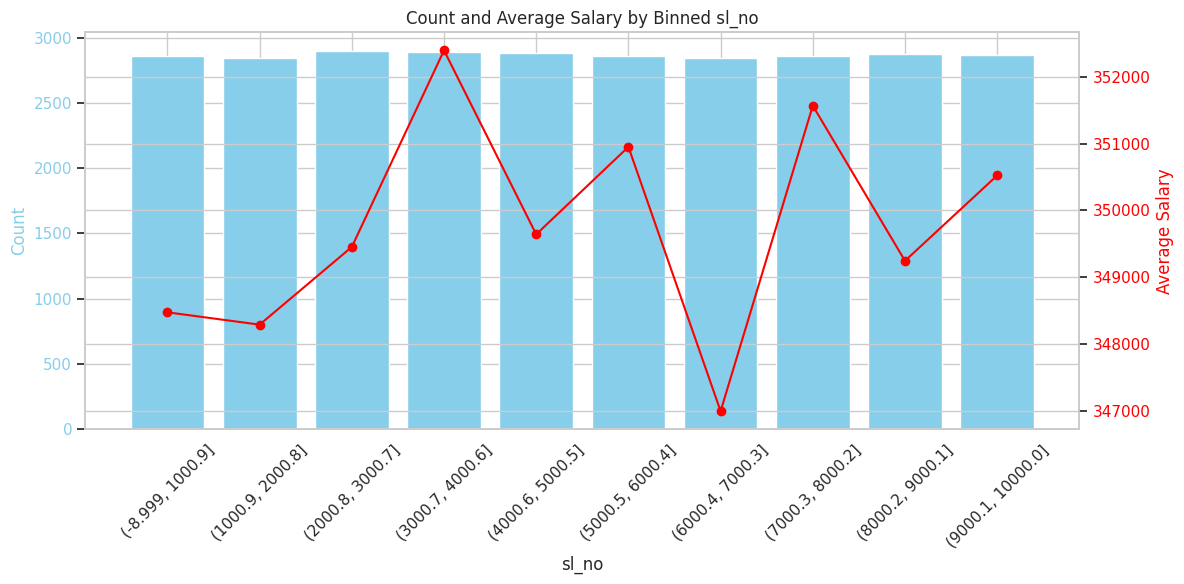


Analysis for column: gender
Category | Count | Average Salary
F | 14655 | 348720.62
M | 14015 | 350845.19


<Figure size 1000x600 with 0 Axes>

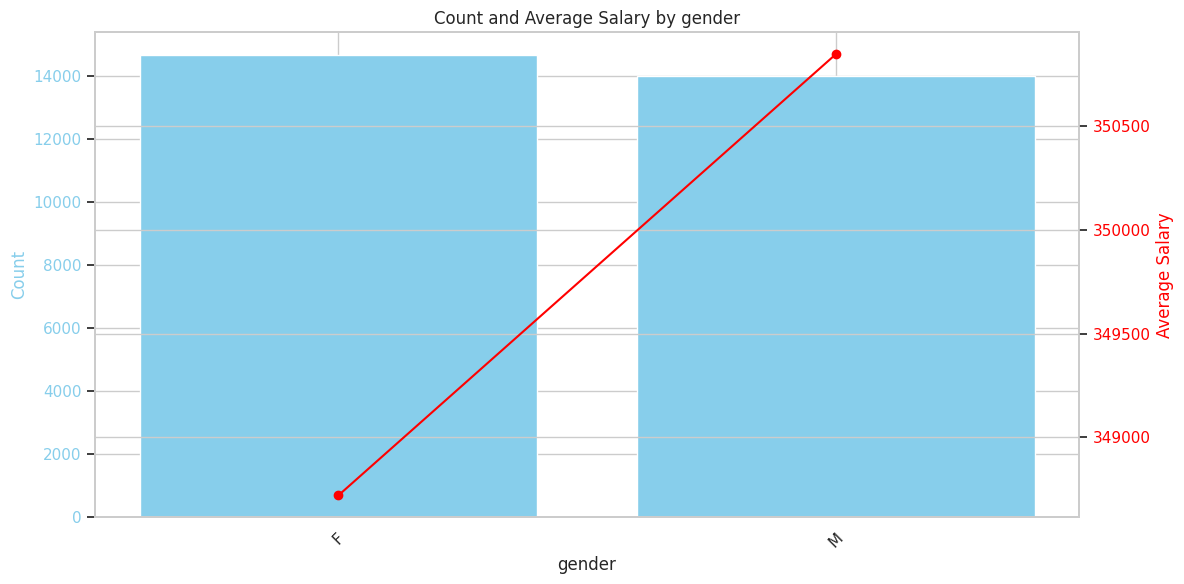


Analysis for column: ssc_p
Binned range | Count | Average Salary
(49.95, 55.0] | 2940 | 349494.71
(55.0, 60.0] | 2899 | 351130.19
(60.0, 65.0] | 2959 | 349694.65
(65.0, 70.0] | 2765 | 348419.62
(70.0, 75.0] | 2905 | 350816.02
(75.0, 80.0] | 2869 | 348416.47
(80.0, 85.0] | 2872 | 348061.04
(85.0, 90.0] | 3030 | 353072.40
(90.0, 95.0] | 2823 | 348263.22
(95.0, 100.0] | 2608 | 349966.74


<ipython-input-4-db83edf1a2d9>:21: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  salary_data = data.groupby(f'{col}_binned')['salary'].mean()  # Changed 'Salary' to 'salary'


<Figure size 1000x600 with 0 Axes>

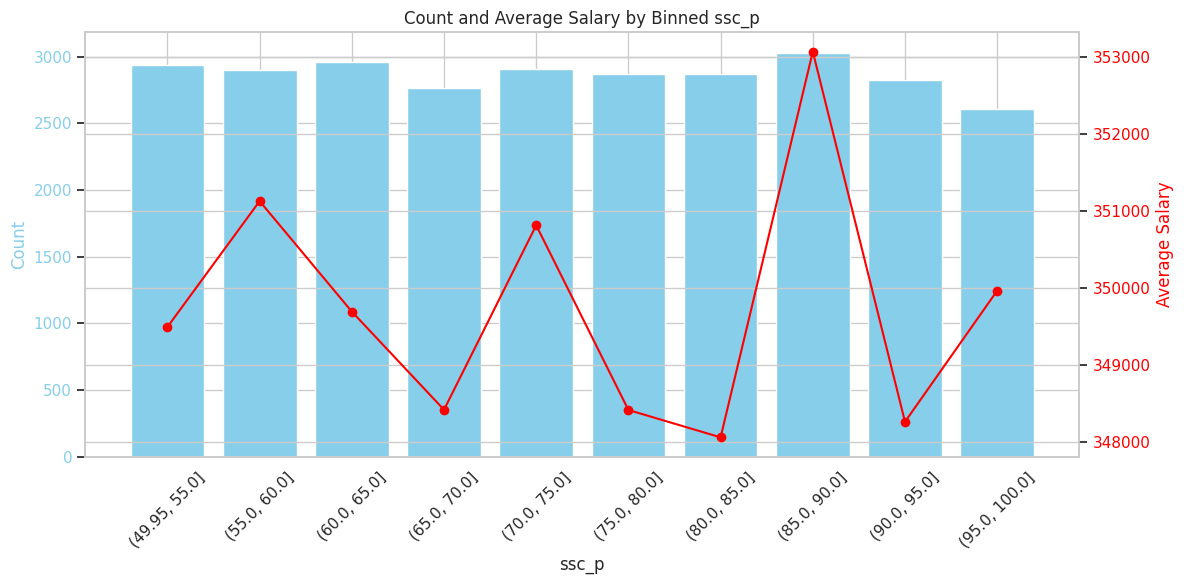


Analysis for column: ssc_b
Category | Count | Average Salary
Central | 14543 | 349359.93
Others | 14127 | 350170.21


<Figure size 1000x600 with 0 Axes>

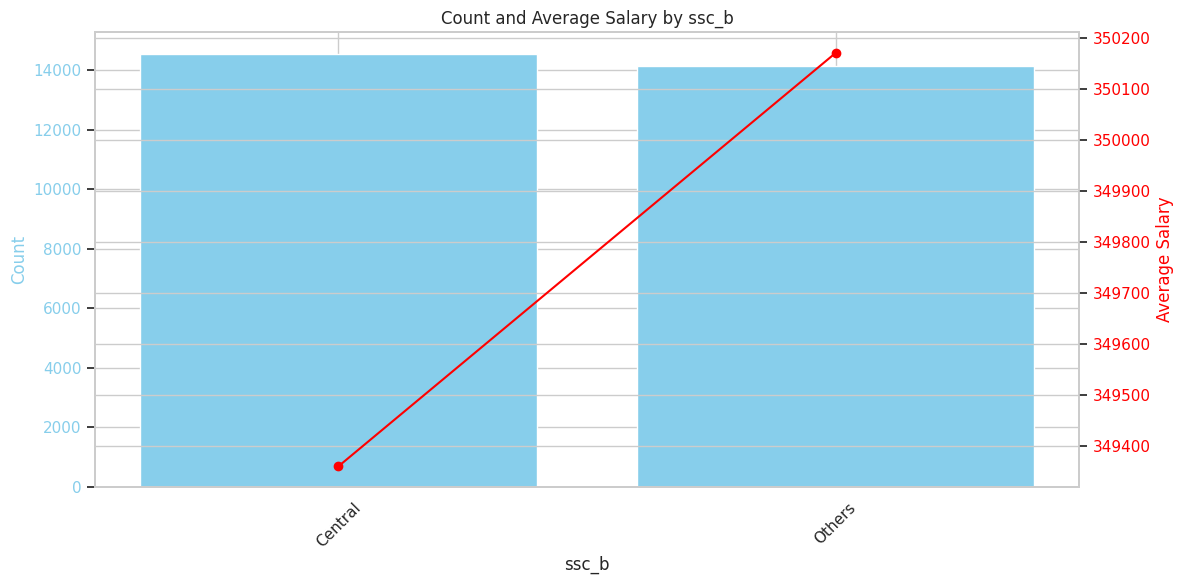


Analysis for column: hsc_p
Binned range | Count | Average Salary
(49.96, 55.009] | 2806 | 350833.84
(55.009, 60.008] | 2977 | 350411.04
(60.008, 65.007] | 2796 | 350144.41
(65.007, 70.006] | 2824 | 349463.76
(70.006, 75.005] | 2808 | 349585.62
(75.005, 80.004] | 2837 | 348485.06
(80.004, 85.003] | 2985 | 351924.40
(85.003, 90.002] | 3024 | 349199.42
(90.002, 95.001] | 2767 | 349528.46
(95.001, 100.0] | 2846 | 347922.01


<ipython-input-4-db83edf1a2d9>:21: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  salary_data = data.groupby(f'{col}_binned')['salary'].mean()  # Changed 'Salary' to 'salary'


<Figure size 1000x600 with 0 Axes>

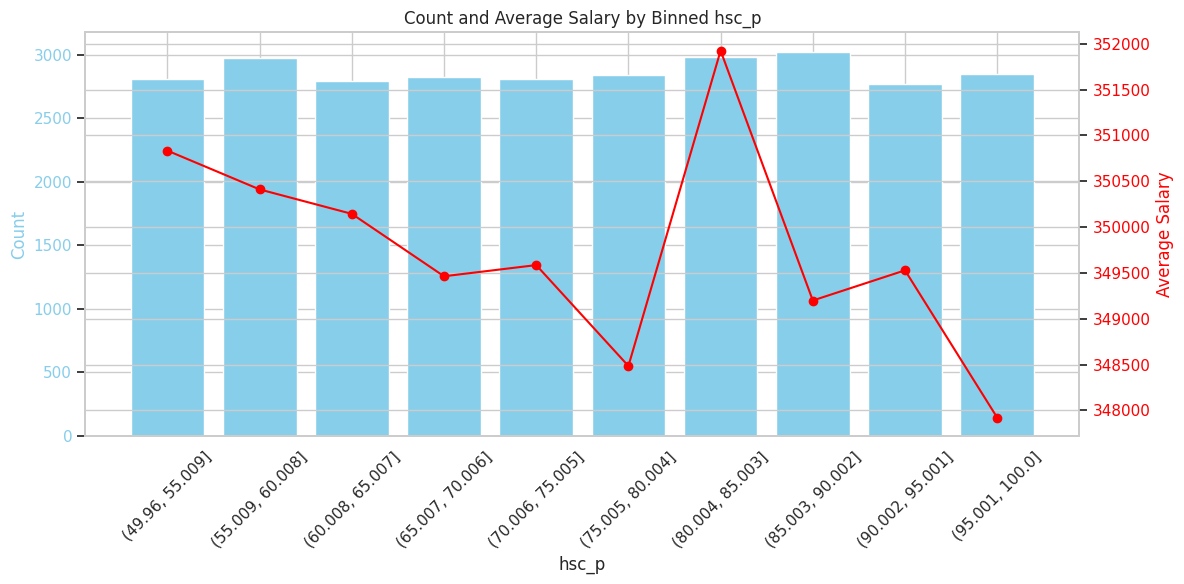


Analysis for column: hsc_b
Category | Count | Average Salary
Others | 14361 | 349719.19
Central | 14309 | 349799.33


<Figure size 1000x600 with 0 Axes>

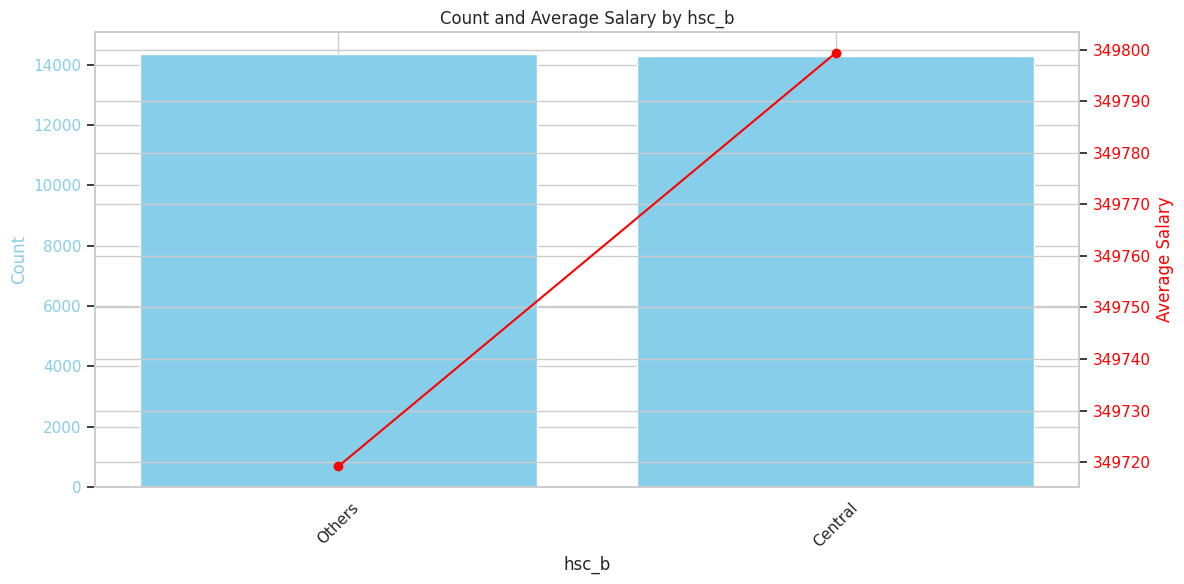


Analysis for column: hsc_s
Category | Count | Average Salary
Science | 11814 | 349148.02
Commerce | 8458 | 350875.48
Arts | 8398 | 349494.71


<Figure size 1000x600 with 0 Axes>

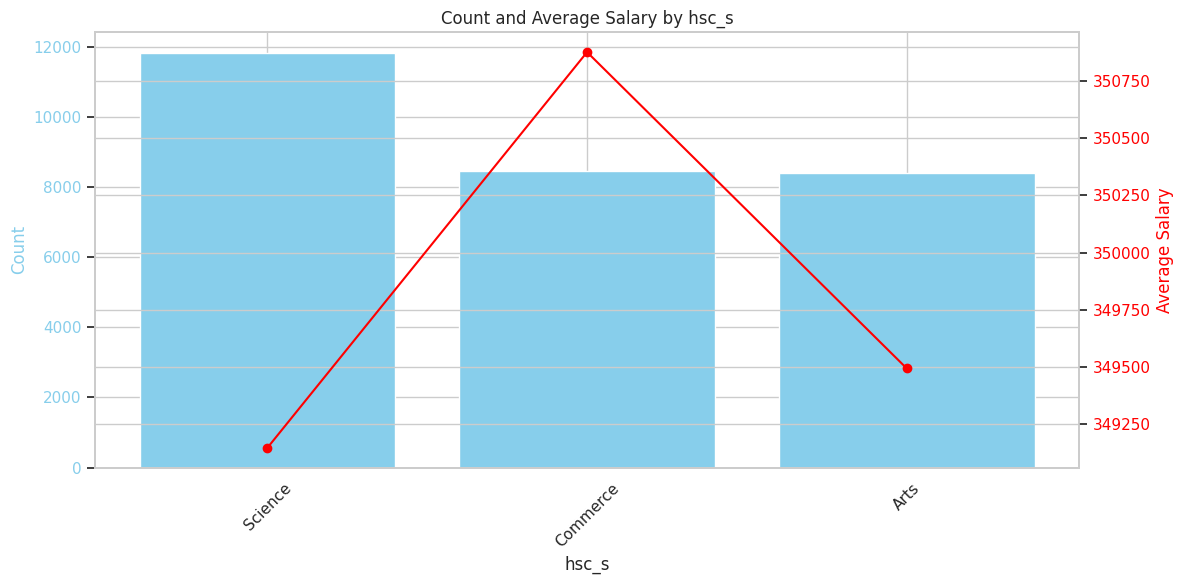


Analysis for column: degree_p
Binned range | Count | Average Salary
(49.95, 54.999] | 2747 | 349382.03
(54.999, 59.998] | 2949 | 348141.61
(59.998, 64.997] | 2911 | 348299.49
(64.997, 69.996] | 2850 | 347327.44
(69.996, 74.995] | 2840 | 349829.58
(74.995, 79.994] | 2880 | 351164.82
(79.994, 84.993] | 3002 | 350202.72
(84.993, 89.992] | 2785 | 349714.05
(89.992, 94.991] | 2786 | 352315.89
(94.991, 99.99] | 2920 | 351269.16


<ipython-input-4-db83edf1a2d9>:21: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  salary_data = data.groupby(f'{col}_binned')['salary'].mean()  # Changed 'Salary' to 'salary'


<Figure size 1000x600 with 0 Axes>

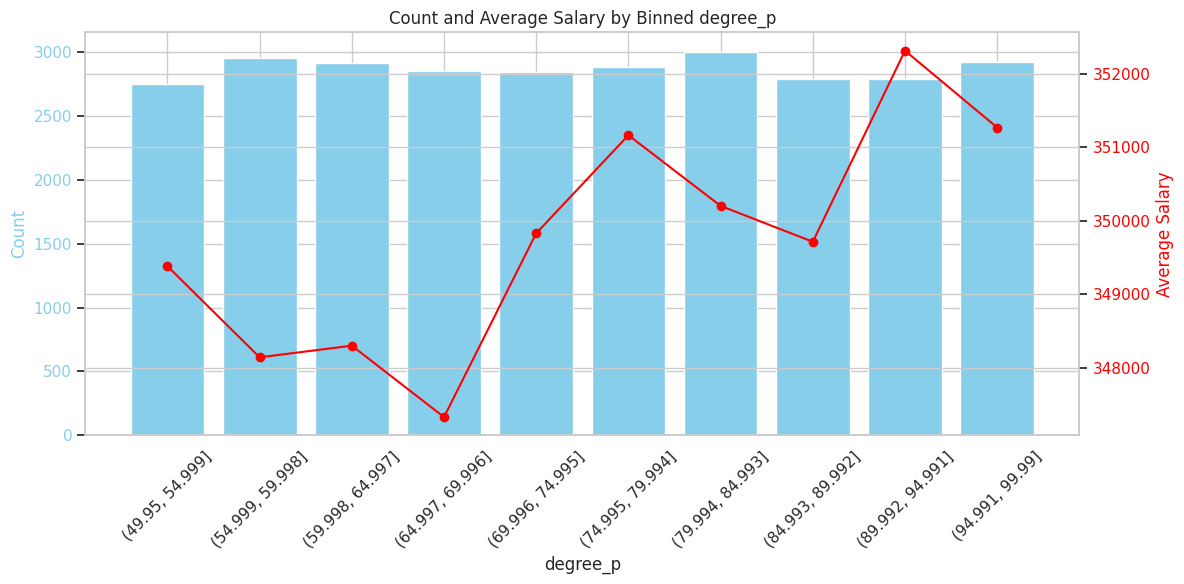


Analysis for column: degree_t
Category | Count | Average Salary
Sci&Tech | 10212 | 349456.45
Comm&Mgmt | 10105 | 350091.90
Arts | 8353 | 349726.82


<Figure size 1000x600 with 0 Axes>

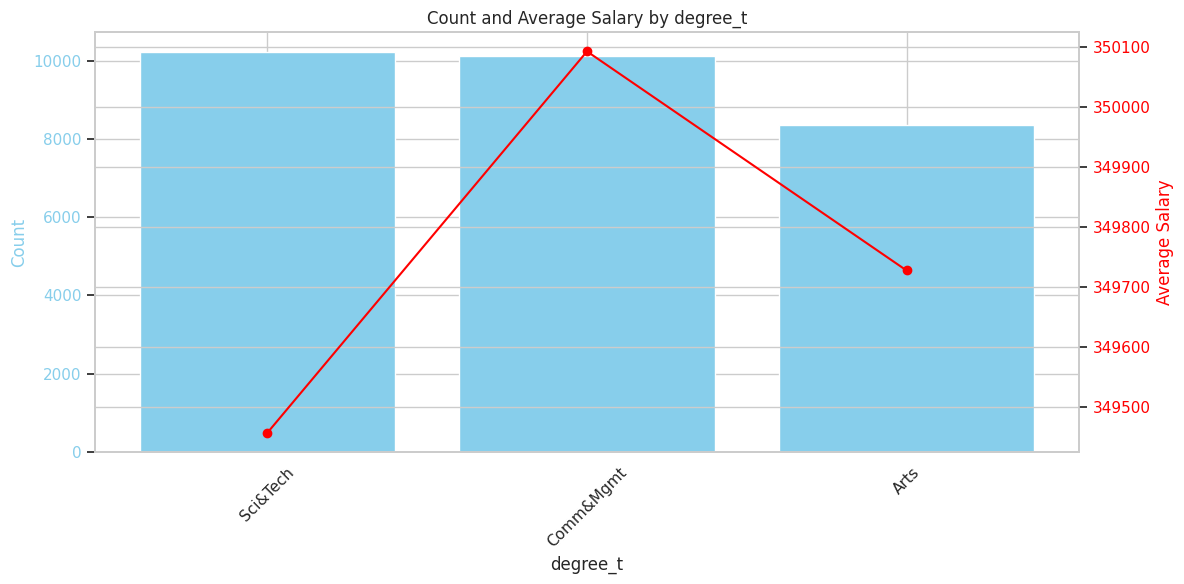


Analysis for column: workex
Category | Count | Average Salary
No | 14338 | 350189.00
Yes | 14332 | 349329.21


<Figure size 1000x600 with 0 Axes>

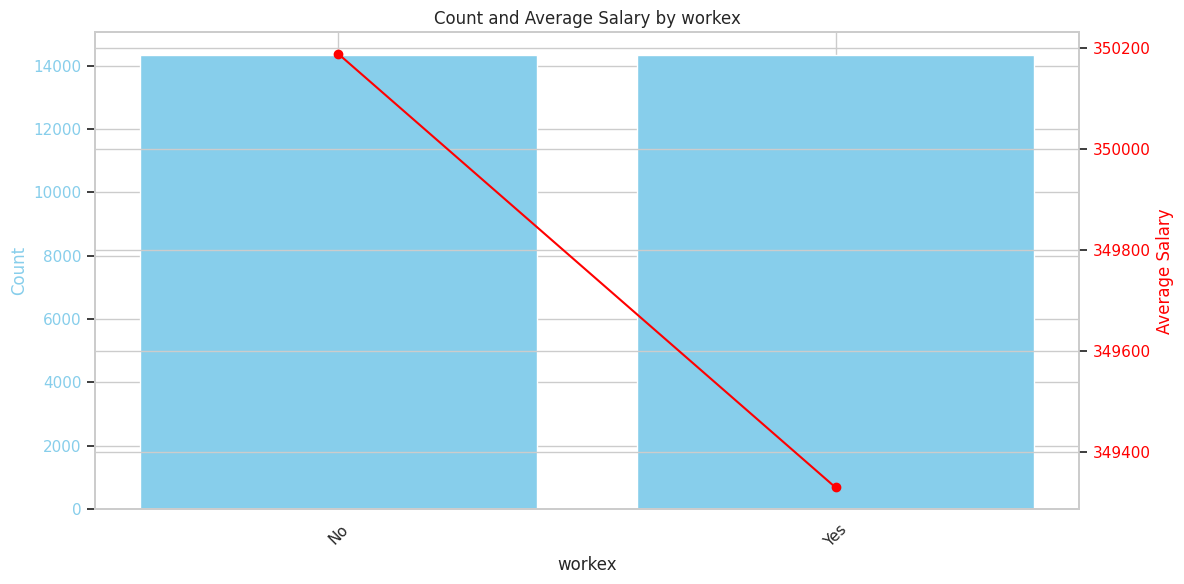


Analysis for column: etest_p
Binned range | Count | Average Salary
(49.95, 55.0] | 2833 | 351898.11
(55.0, 60.0] | 2736 | 351212.95
(60.0, 65.0] | 2942 | 350039.78
(65.0, 70.0] | 2791 | 347990.66
(70.0, 75.0] | 2852 | 350470.99
(75.0, 80.0] | 3055 | 346879.04
(80.0, 85.0] | 2743 | 351702.63
(85.0, 90.0] | 2961 | 350008.67
(90.0, 95.0] | 2830 | 349835.89
(95.0, 100.0] | 2927 | 347899.13


<ipython-input-4-db83edf1a2d9>:21: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  salary_data = data.groupby(f'{col}_binned')['salary'].mean()  # Changed 'Salary' to 'salary'


<Figure size 1000x600 with 0 Axes>

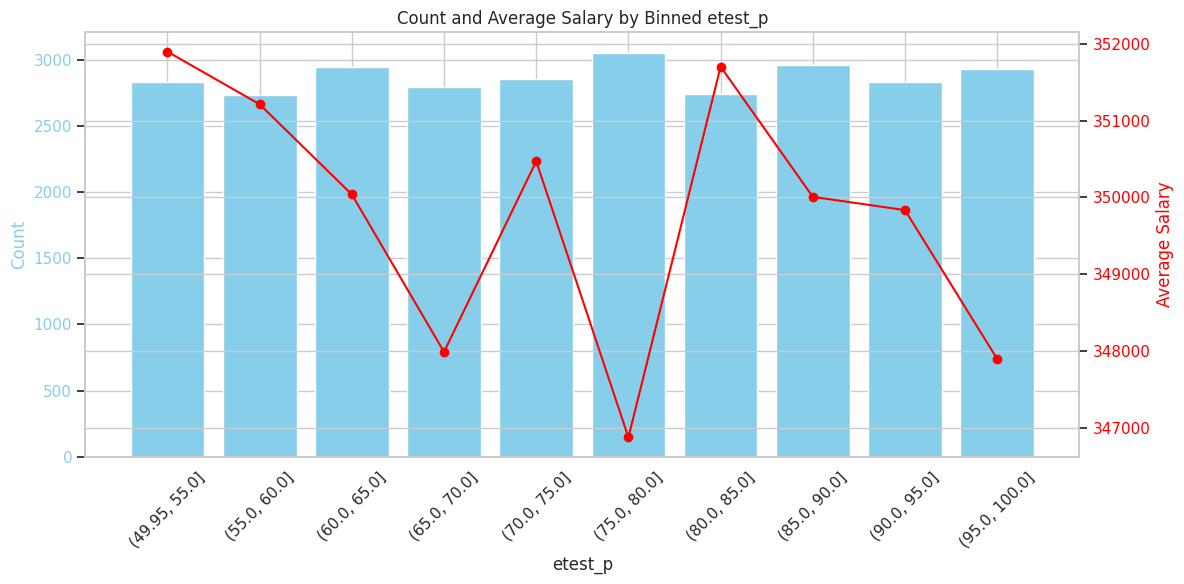


Analysis for column: specialisation
Category | Count | Average Salary
Mkt&HR | 14369 | 349607.37
Mkt&Fin | 14301 | 349911.73


<Figure size 1000x600 with 0 Axes>

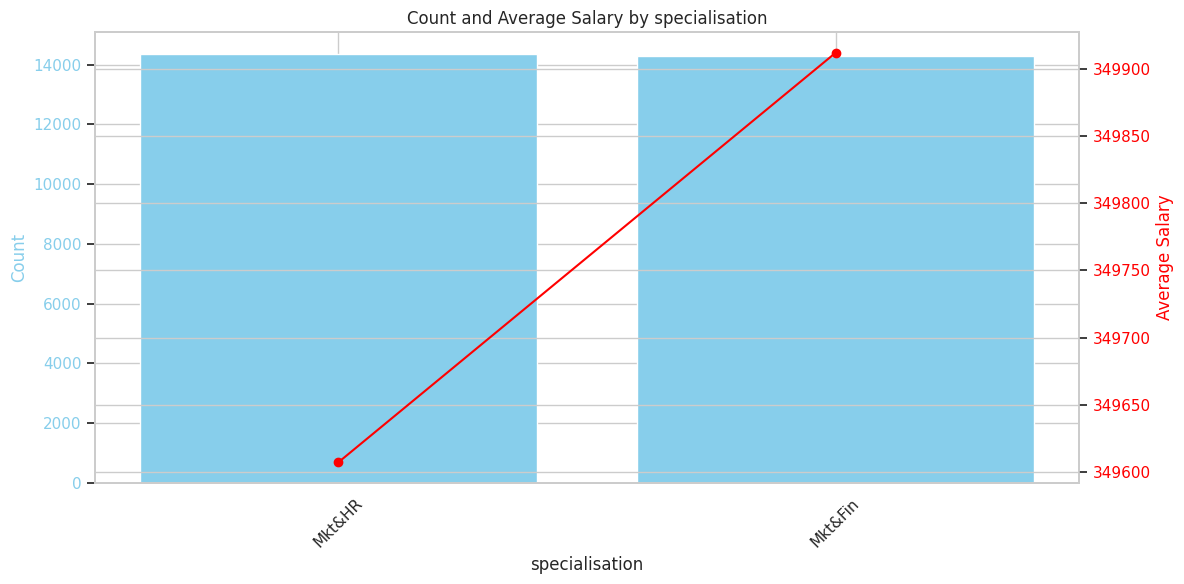


Analysis for column: mba_p
Binned range | Count | Average Salary
(49.95, 55.0] | 2653 | 347425.37
(55.0, 60.0] | 2891 | 351588.49
(60.0, 65.0] | 2973 | 349915.45
(65.0, 70.0] | 2847 | 350457.17
(70.0, 75.0] | 2852 | 349579.33
(75.0, 80.0] | 2930 | 349591.73
(80.0, 85.0] | 2987 | 349246.62
(85.0, 90.0] | 2844 | 352047.85
(90.0, 95.0] | 2975 | 350027.61
(95.0, 100.0] | 2718 | 347433.44


<ipython-input-4-db83edf1a2d9>:21: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  salary_data = data.groupby(f'{col}_binned')['salary'].mean()  # Changed 'Salary' to 'salary'


<Figure size 1000x600 with 0 Axes>

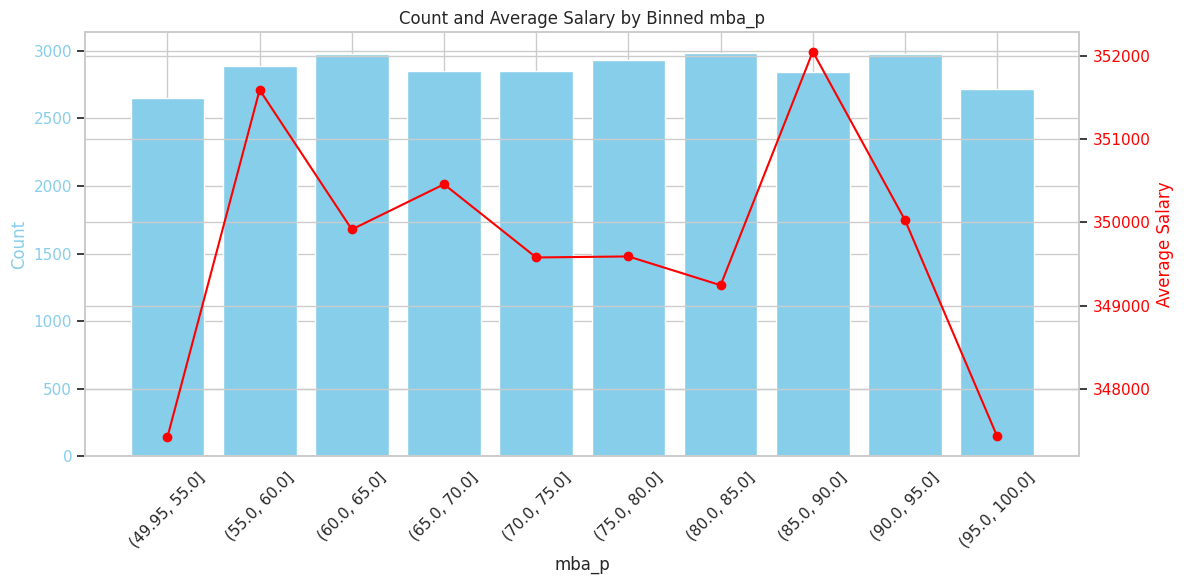


Analysis for column: status
Category | Count | Average Salary
Placed | 14455 | 349854.03
Not Placed | 14215 | 349662.75


<Figure size 1000x600 with 0 Axes>

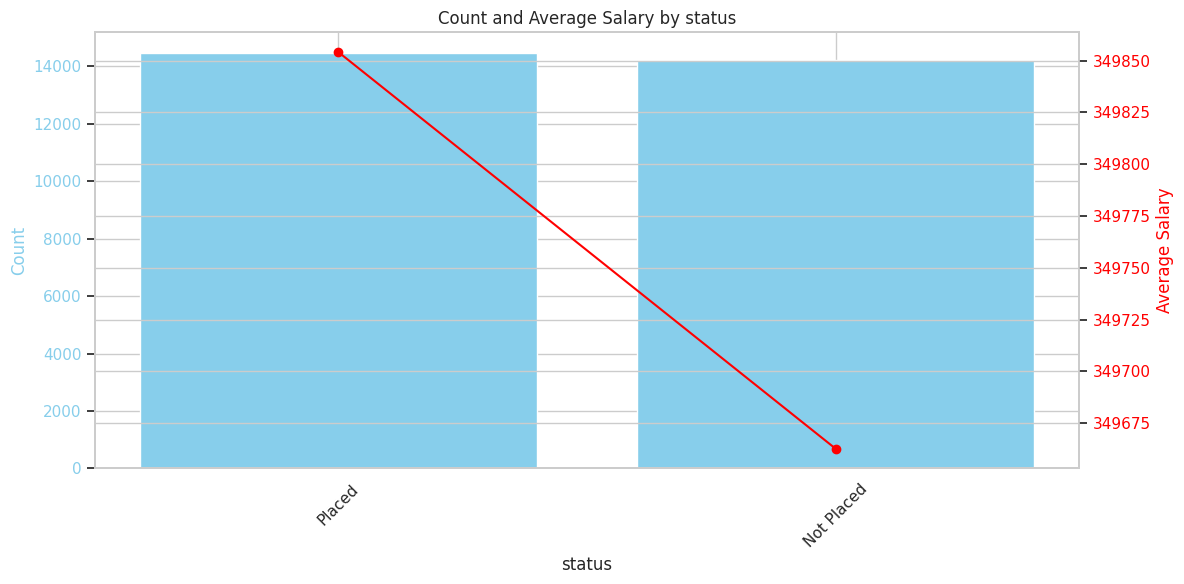


Analysis for column: Placed
Category | Count | Average Salary
Yes | 14455 | 349854.03
No | 14215 | 349662.75


<Figure size 1000x600 with 0 Axes>

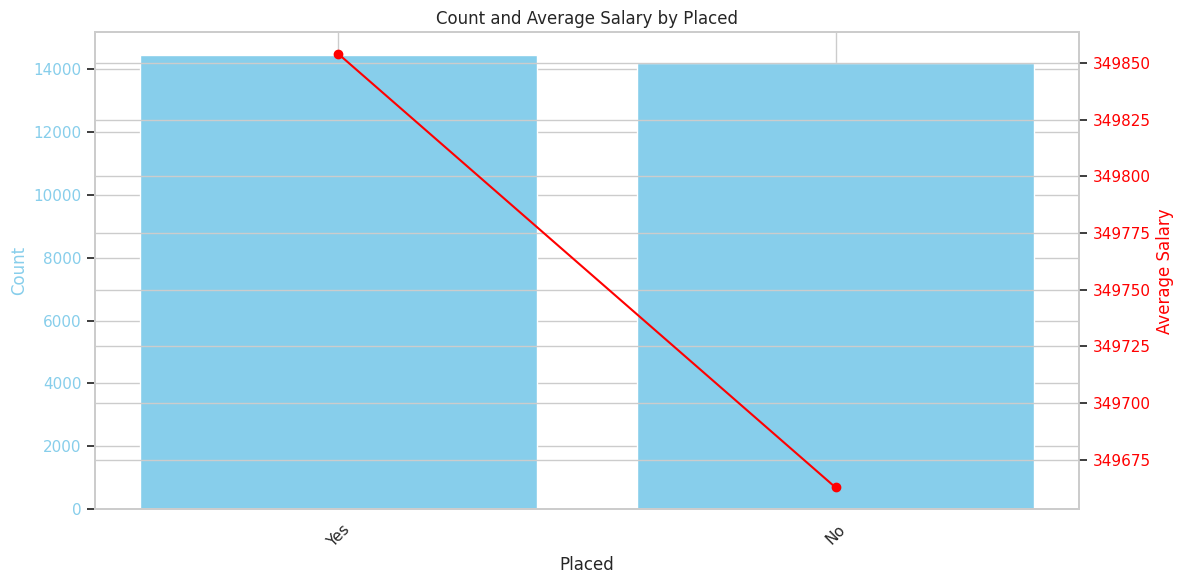

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
file_path = '/content/modified_dataset.csv'  # Replace with your actual file path
data = pd.read_csv(file_path)

# Set the plot style
sns.set(style="whitegrid")

# Iterate over each column to compare counts and salary
for col in data.columns:
    if col != 'salary':  # Changed 'Salary' to 'salary' assuming the column name is 'salary'
        print(f"\nAnalysis for column: {col}")
        plt.figure(figsize=(10, 6))

        if data[col].dtype in ['float64', 'int64']:
            # For numeric columns, bin values for count comparison
            data[f'{col}_binned'] = pd.cut(data[col], bins=10)  # Adjust the number of bins as needed
            salary_data = data.groupby(f'{col}_binned')['salary'].mean()  # Changed 'Salary' to 'salary'
            count_data = data[f'{col}_binned'].value_counts().sort_index()

            # Print count and average salary per bin
            print("Binned range | Count | Average Salary")
            for binned_range, count in count_data.items():
                avg_salary = salary_data[binned_range]
                print(f"{binned_range} | {count} | {avg_salary:.2f}")

            # Plot the count and average salary per bin
            fig, ax1 = plt.subplots(figsize=(12, 6))

            # Count bar plot on the left y-axis
            ax1.bar(count_data.index.astype(str), count_data.values, color="skyblue", label="Count")
            ax1.set_xlabel(col)
            ax1.set_ylabel("Count", color="skyblue")
            ax1.tick_params(axis='y', labelcolor="skyblue")
            plt.xticks(rotation=45)

            # Average salary line plot on the right y-axis
            ax2 = ax1.twinx()
            ax2.plot(salary_data.index.astype(str), salary_data.values, color="red", label="Average Salary", marker="o")
            ax2.set_ylabel("Average Salary", color="red")
            ax2.tick_params(axis='y', labelcolor="red")

            plt.title(f'Count and Average Salary by Binned {col}')
            fig.tight_layout()
            plt.show()

            # Remove the binned column after plotting
            data.drop(columns=[f'{col}_binned'], inplace=True)

        else:
            # For categorical columns, calculate counts and average salary
            count_data = data[col].value_counts()
            salary_data = data.groupby(col)['salary'].mean()  # Changed 'Salary' to 'salary'

            # Print count and average salary for each category
            print("Category | Count | Average Salary")
            for category, count in count_data.items():
                avg_salary = salary_data[category]
                print(f"{category} | {count} | {avg_salary:.2f}")

            # Plot the count and average salary
            fig, ax1 = plt.subplots(figsize=(12, 6))

            # Count bar plot on the left y-axis
            ax1.bar(count_data.index, count_data.values, color="skyblue", label="Count")
            ax1.set_xlabel(col)
            ax1.set_ylabel("Count", color="skyblue")
            ax1.tick_params(axis='y', labelcolor="skyblue")
            plt.xticks(rotation=45)

            # Average salary line plot on the right y-axis
            ax2 = ax1.twinx()
            ax2.plot(salary_data.index, salary_data.values, color="red", label="Average Salary", marker="o")
            ax2.set_ylabel("Average Salary", color="red")
            ax2.tick_params(axis='y', labelcolor="red")

            plt.title(f'Count and Average Salary by {col}')
            fig.tight_layout()
            plt.show()


Number of students in each category (hsc_s vs. specialisation):
specialisation  Mkt&Fin  Mkt&HR
hsc_s                          
Arts               4118    4280
Commerce           4271    4187
Science            5912    5902


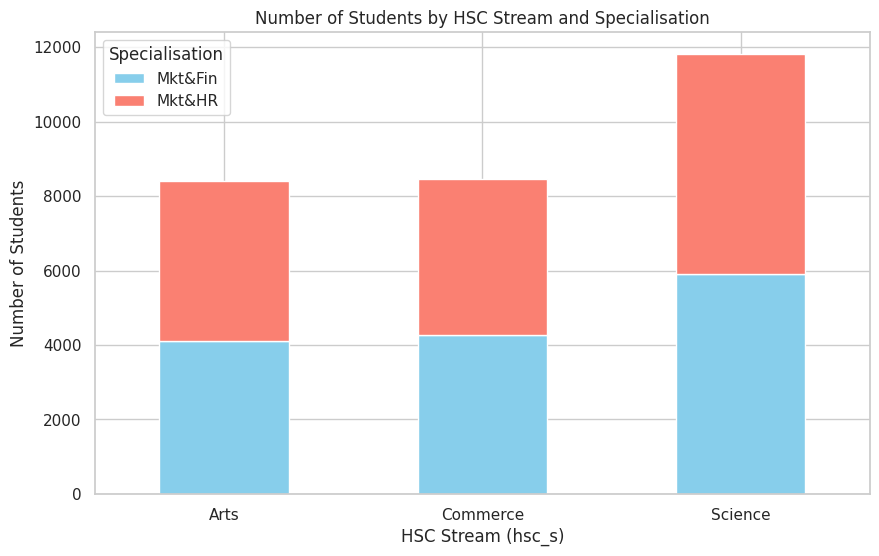

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
file_path = '/content/modified_dataset.csv'  # Replace with your actual file path
data = pd.read_csv(file_path)

# Filter for relevant specialisations and group by hsc_s and specialisation columns
filtered_data = data[(data['specialisation'].isin(['Mkt&Fin', 'Mkt&HR'])) &
                     (data['hsc_s'].isin(['Arts', 'Science', 'Commerce']))]

# Count students in each category
result = filtered_data.groupby(['hsc_s', 'specialisation']).size().unstack().fillna(0)

# Display the result in text form
print("Number of students in each category (hsc_s vs. specialisation):")
print(result)

# Plot the result as a bar chart
result.plot(kind='bar', stacked=True, figsize=(10, 6), color=['skyblue', 'salmon'])

# Add title and labels
plt.title("Number of Students by HSC Stream and Specialisation")
plt.xlabel("HSC Stream (hsc_s)")
plt.ylabel("Number of Students")
plt.legend(title="Specialisation")
plt.xticks(rotation=0)

# Display the plot
plt.show()


Average Salary by Degree Type:
degree_t
Arts         349726.816726
Comm&Mgmt    350091.897877
Sci&Tech     349456.451196
Name: salary, dtype: float64


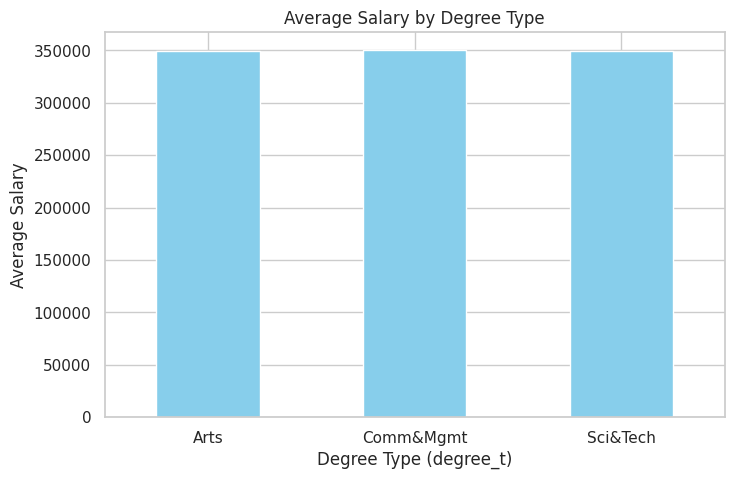

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
file_path = '/content/modified_dataset.csv'  # Replace with your actual file path
data = pd.read_csv(file_path)

# Filter for the relevant degree types and calculate the average salary
filtered_data = data[data['degree_t'].isin(['Arts', 'Comm&Mgmt', 'Sci&Tech'])]
average_salary = filtered_data.groupby('degree_t')['salary'].mean()

# Display the result in text form
print("Average Salary by Degree Type:")
print(average_salary)

# Plot the result as a bar chart
average_salary.plot(kind='bar', color='skyblue', figsize=(8, 5))

# Add title and labels
plt.title("Average Salary by Degree Type")
plt.xlabel("Degree Type (degree_t)")
plt.ylabel("Average Salary")
plt.xticks(rotation=0)

# Display the plot
plt.show()


In [ ]:
import pandas as pd

# Load the dataset
file_path = '/content/updated_dataset1.csv'  # Replace with your actual file path
data = pd.read_csv(file_path)

# Group by 'degree_t' and 'Placed' and count occurrences
placement_counts = data.groupby(['degree_t', 'Placed']).size().unstack().fillna(0)

# Calculate the percentage of people placed and not placed for each degree type
placement_percentage = placement_counts.div(placement_counts.sum(axis=1), axis=0) * 100

# Display the result
print("Percentage of People Placed and Not Placed by Degree Type:")
print(placement_percentage)


Percentage of People Placed and Not Placed by Degree Type:
Placed            No        Yes
degree_t                       
Arts       49.712904  50.287096
Comm&Mgmt  49.774300  50.225700
Sci&Tech   49.584323  50.415677


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
file_path = '/content/modified_dataset.csv'  # Replace with your actual file path
data = pd.read_csv(file_path)

# Function to calculate and display gender distribution by column
def analyze_gender_distribution(column_name):
    gender_counts = data.groupby([column_name, 'gender']).size()
    gender_percentages = gender_counts.groupby(level=0).apply(lambda x: x / x.sum() * 100)

    print(f"Gender distribution by {column_name}:\n")
    print(gender_counts.unstack())
    print("\nPercentage distribution:\n")
    print(gender_percentages.unstack())
    print("\n")

# Analyze gender distribution for selected columns
columns_to_analyze = ['ssc_b', 'hsc_b', 'degree_t', 'specialisation']
for column in columns_to_analyze:
    analyze_gender_distribution(column)

Gender distribution by ssc_b:

gender      F     M
ssc_b              
Central  7480  7063
Others   7175  6952

Percentage distribution:

gender                   F          M
ssc_b   ssc_b                        
Central Central  51.433679  48.566321
Others  Others   50.789269  49.210731


Gender distribution by hsc_b:

gender      F     M
hsc_b              
Central  7320  6989
Others   7335  7026

Percentage distribution:

gender                   F          M
hsc_b   hsc_b                        
Central Central  51.156615  48.843385
Others  Others   51.075830  48.924170


Gender distribution by degree_t:

gender        F     M
degree_t             
Arts       4260  4093
Comm&Mgmt  5132  4973
Sci&Tech   5263  4949

Percentage distribution:

gender                       F          M
degree_t  degree_t                       
Arts      Arts       50.999641  49.000359
Comm&Mgmt Comm&Mgmt  50.786739  49.213261
Sci&Tech  Sci&Tech   51.537407  48.462593


Gender distribution by specialisa

In [ ]:
import pandas as pd

# Load the dataset
file_path = '/content/modified_dataset.csv'  # Replace with your actual file path
data = pd.read_csv(file_path)

# Define mapping between HSC and Degree streams for comparison
stream_map = {
    'Arts': 'Arts',
    'Commerce': 'Comm&Mgmt',
    'Science': 'Sci&Tech'
}

# Calculate percentage distribution of each stream in 'hsc_s' column
hsc_stream_counts = data['hsc_s'].value_counts(normalize=True) * 100
print("Percentage distribution of each stream in HSC (hsc_s):")
print(hsc_stream_counts)

# Calculate percentage distribution of each stream in 'degree_t' column
degree_stream_counts = data['degree_t'].value_counts(normalize=True) * 100
print("\nPercentage distribution of each stream in Degree (degree_t):")
print(degree_stream_counts)

# Map HSC and Degree streams and identify stream changes
data['mapped_degree_t'] = data['hsc_s'].map(stream_map)
data['stream_change'] = data['mapped_degree_t'] != data['degree_t']

# Calculate percentage of people who have changed their stream
stream_change_percentage = (data['stream_change'].sum() / len(data)) * 100
print(f"\nPercentage of people who changed their stream: {stream_change_percentage:.2f}%")


Percentage distribution of each stream in HSC (hsc_s):
hsc_s
Science     41.206836
Commerce    29.501221
Arts        29.291943
Name: proportion, dtype: float64

Percentage distribution of each stream in Degree (degree_t):
degree_t
Sci&Tech     35.619114
Comm&Mgmt    35.245902
Arts         29.134984
Name: proportion, dtype: float64

Percentage of people who changed their stream: 66.94%


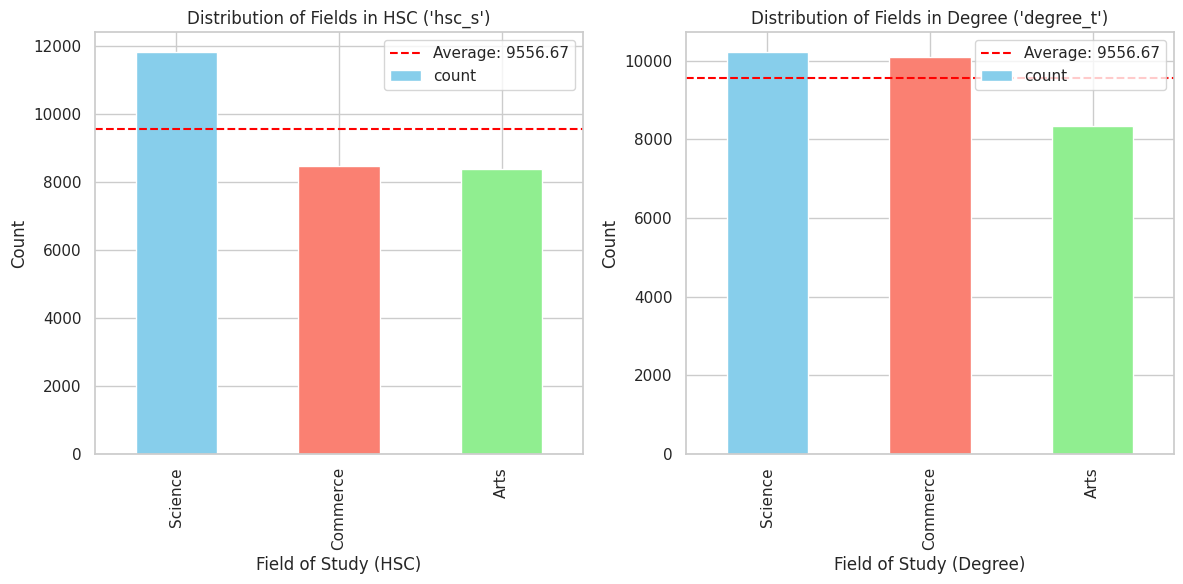

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
file_path = '/content/modified_dataset.csv'
data = pd.read_csv(file_path)

# Calculate counts for each category in 'hsc_s' and 'degree_t'
hsc_s_counts = data['hsc_s'].value_counts()
degree_t_counts = data['degree_t'].replace({'Comm&Mgmt': 'Commerce', 'Sci&Tech': 'Science'}).value_counts()

# Calculate the average (total count / number of categories) for 'hsc_s' and 'degree_t'
hsc_s_avg = hsc_s_counts.mean()
degree_t_avg = degree_t_counts.mean()

# Create bar plots for 'hsc_s' and 'degree_t' fields
plt.figure(figsize=(12, 6))

# Plot for 'hsc_s'
plt.subplot(1, 2, 1)
hsc_s_counts.plot(kind='bar', color=['skyblue', 'salmon', 'lightgreen'])
plt.axhline(hsc_s_avg, color='red', linestyle='--', label=f'Average: {hsc_s_avg:.2f}')
plt.title("Distribution of Fields in HSC ('hsc_s')")
plt.xlabel("Field of Study (HSC)")
plt.ylabel("Count")
plt.legend()

# Plot for 'degree_t'
plt.subplot(1, 2, 2)
degree_t_counts.plot(kind='bar', color=['skyblue', 'salmon', 'lightgreen'])
plt.axhline(degree_t_avg, color='red', linestyle='--', label=f'Average: {degree_t_avg:.2f}')
plt.title("Distribution of Fields in Degree ('degree_t')")
plt.xlabel("Field of Study (Degree)")
plt.ylabel("Count")
plt.legend()

plt.tight_layout()
plt.show()


Enter gender (M/F): M
Enter SSC percentage (ssc_p): 65
Enter HSC percentage (hsc_p): 62
Enter HSC stream (hsc_s) (e.g., Arts, Commerce, Science): Commerce
Enter Degree percentage (degree_p): 78
Enter Degree type (degree_t) (e.g., Comm&Mgmt, Sci&Tech, Others): Sci&Tech
Enter Work Experience (workex) (Yes/No): No
Enter E-test percentage (etest_p): 89
Enter MBA Specialisation (specialisation) (e.g., Mkt&Fin, Mkt&HR or None if no specialisation): Mkt&HR
Enter MBA percentage (mba_p): 92

Percentage of people who changed their stream: 66.94%

Number of M students by degree type:
degree_t
Comm&Mgmt    4973
Sci&Tech     4949
Arts         4093
Name: count, dtype: int64

Number of M students by HSC stream:
hsc_s
Science     5722
Commerce    4214
Arts        4079
Name: count, dtype: int64

Number of M students by MBA specialisation:
specialisation
Mkt&Fin    7028
Mkt&HR     6987
Name: count, dtype: int64


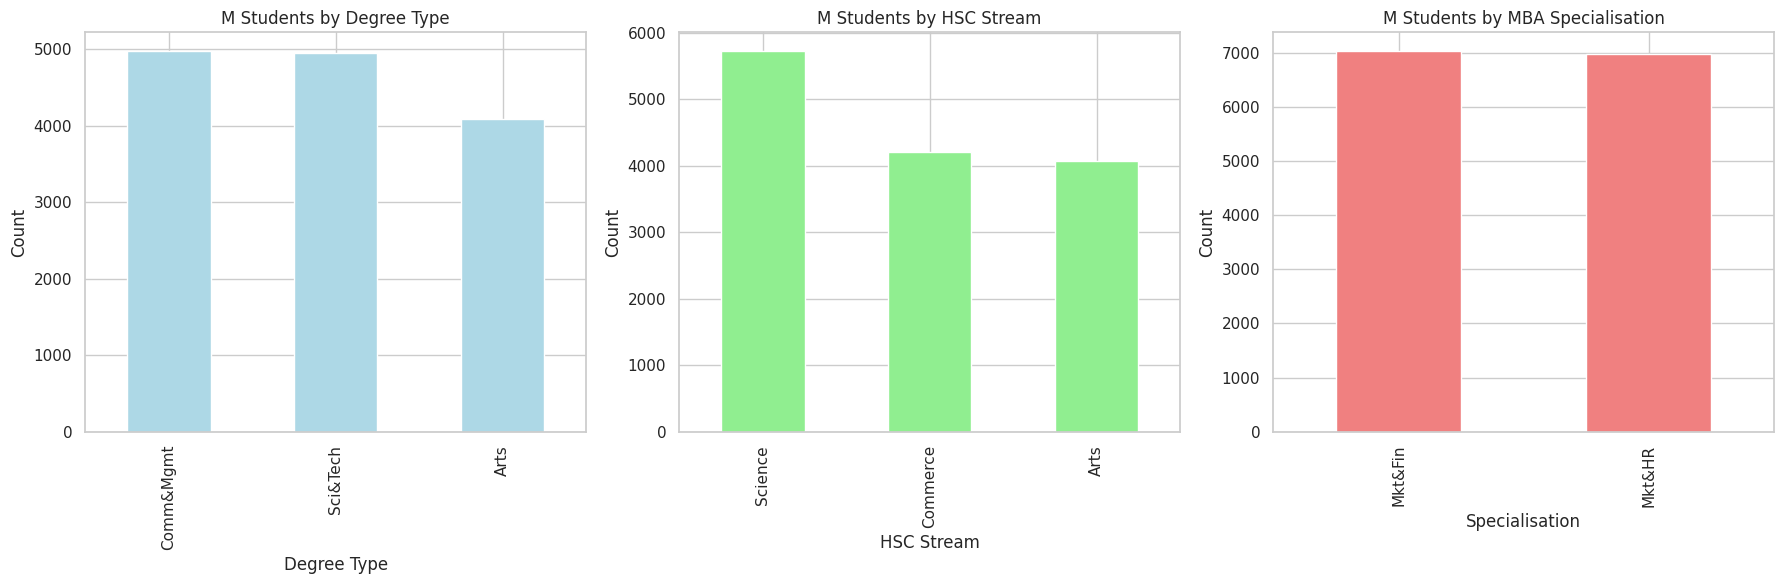


Stream Change Detected: HSC Stream: Commerce, Degree Stream: Sci&Tech
Percentage increased from HSC to Degree: 25.81%
Estimated Degree Percentage if no stream change: 75.21

Percentile Ranks:
SSC Percentage (ssc_p): 65.0 is in the 30.69 percentile.
HSC Percentage (hsc_p): 62.0 is in the 23.92 percentile.
Degree Percentage (degree_p): 78.0 is in the 55.90 percentile.
E-test Percentage (etest_p): 89.0 is in the 77.61 percentile.
MBA Percentage (mba_p): 92.0 is in the 84.44 percentile.

Weighted Average Percentile: 64.17
Based on your academic and test performance, your placement chances are: Moderate
Predicted Salary based on the closest match: $289578.00


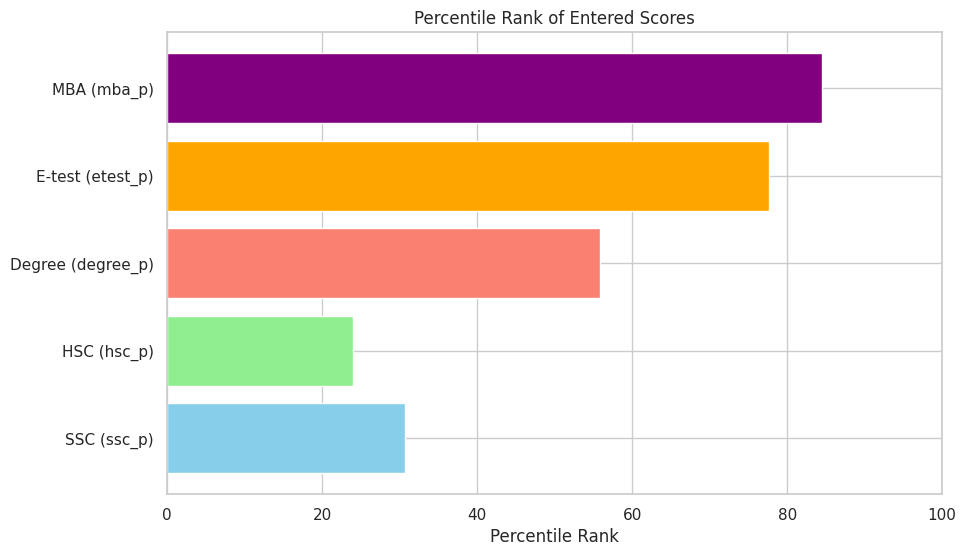

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
import numpy as np

# Load the dataset
file_path = '/content/modified_dataset.csv'  # Replace with your actual file path
data = pd.read_csv(file_path)

# Define the mapping between HSC and Degree streams
stream_map = {
    'Arts': 'Arts',
    'Commerce': 'Comm&Mgmt',
    'Science': 'Sci&Tech'
}

# Take user input for each specified column
gender = input("Enter gender (M/F): ")
ssc_p = float(input("Enter SSC percentage (ssc_p): "))
hsc_p = float(input("Enter HSC percentage (hsc_p): "))
hsc_s = input("Enter HSC stream (hsc_s) (e.g., Arts, Commerce, Science): ")
degree_p = float(input("Enter Degree percentage (degree_p): "))
degree_t = input("Enter Degree type (degree_t) (e.g., Comm&Mgmt, Sci&Tech, Others): ")
workex = input("Enter Work Experience (workex) (Yes/No): ")
etest_p = float(input("Enter E-test percentage (etest_p): "))
specialisation = input("Enter MBA Specialisation (specialisation) (e.g., Mkt&Fin, Mkt&HR or None if no specialisation): ")

# Check if the user has an MBA specialisation
if specialisation.lower() != "none":
    mba_p = float(input("Enter MBA percentage (mba_p): "))
else:
    mba_p = None  # Set mba_p to None if there is no MBA specialisation

# Part 1: Calculate the percentage of people who changed their stream
# Map HSC and Degree streams and identify changes
data['mapped_degree_t'] = data['hsc_s'].map(stream_map)
data['stream_change'] = data['mapped_degree_t'] != data['degree_t']

# Calculate the percentage of people who changed streams
stream_change_count = data['stream_change'].sum()
total_count = len(data)
stream_change_percentage = (stream_change_count / total_count) * 100

print(f"\nPercentage of people who changed their stream: {stream_change_percentage:.2f}%")

# Part 2: Based on the entered gender, display the number of people in different categories of degree_t, hsc_s, and specialisation
filtered_data_gender = data[data['gender'] == gender]

# Get counts of people by degree_t, hsc_s, and specialisation for the specified gender
degree_counts = filtered_data_gender['degree_t'].value_counts()
hsc_stream_counts = filtered_data_gender['hsc_s'].value_counts()
specialisation_counts = filtered_data_gender['specialisation'].value_counts()

print(f"\nNumber of {gender} students by degree type:")
print(degree_counts)
print(f"\nNumber of {gender} students by HSC stream:")
print(hsc_stream_counts)
print(f"\nNumber of {gender} students by MBA specialisation:")
print(specialisation_counts)

# Plot graphs for each count output
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# Plot for degree_t
degree_counts.plot(kind='bar', ax=axes[0], color='lightblue')
axes[0].set_title(f"{gender} Students by Degree Type")
axes[0].set_xlabel("Degree Type")
axes[0].set_ylabel("Count")

# Plot for hsc_s
hsc_stream_counts.plot(kind='bar', ax=axes[1], color='lightgreen')
axes[1].set_title(f"{gender} Students by HSC Stream")
axes[1].set_xlabel("HSC Stream")
axes[1].set_ylabel("Count")

# Plot for specialisation
specialisation_counts.plot(kind='bar', ax=axes[2], color='lightcoral')
axes[2].set_title(f"{gender} Students by MBA Specialisation")
axes[2].set_xlabel("Specialisation")
axes[2].set_ylabel("Count")

plt.tight_layout()
plt.show()

# Part 3: Check for stream change and calculate percentage differences if streams are different
mapped_degree_stream = stream_map.get(hsc_s, None)
if mapped_degree_stream and mapped_degree_stream != degree_t:
    # Calculate the percentage change in scores between HSC and degree
    percentage_change = ((degree_p - hsc_p) / hsc_p) * 100
    change_direction = "increased" if degree_p > hsc_p else "decreased"

    print(f"\nStream Change Detected: HSC Stream: {hsc_s}, Degree Stream: {degree_t}")
    print(f"Percentage {change_direction} from HSC to Degree: {abs(percentage_change):.2f}%")

    # Calculate the average degree percentage for students who did not change streams
    same_stream_data = data[(data['hsc_s'] == hsc_s) & (data['degree_t'] == mapped_degree_stream)]
    if not same_stream_data.empty:
        estimated_degree_p = same_stream_data['degree_p'].mean()
        print(f"Estimated Degree Percentage if no stream change: {estimated_degree_p:.2f}")
else:
    print("\nNo Stream Change Detected.")

# Part 4: Calculate the percentile rank of the entered values for ssc_p, hsc_p, degree_p, etest_p, and mba_p (if applicable)
ssc_p_percentile = stats.percentileofscore(data['ssc_p'], ssc_p)
hsc_p_percentile = stats.percentileofscore(data['hsc_p'], hsc_p)
degree_p_percentile = stats.percentileofscore(data['degree_p'], degree_p)
etest_p_percentile = stats.percentileofscore(data['etest_p'], etest_p)

# Only calculate MBA percentile if mba_p is provided
if mba_p is not None:
    mba_p_percentile = stats.percentileofscore(data['mba_p'], mba_p)
else:
    mba_p_percentile = None  # Set to None if no MBA percentage is provided

# Display percentile ranks in text
print("\nPercentile Ranks:")
print(f"SSC Percentage (ssc_p): {ssc_p} is in the {ssc_p_percentile:.2f} percentile.")
print(f"HSC Percentage (hsc_p): {hsc_p} is in the {hsc_p_percentile:.2f} percentile.")
print(f"Degree Percentage (degree_p): {degree_p} is in the {degree_p_percentile:.2f} percentile.")
print(f"E-test Percentage (etest_p): {etest_p} is in the {etest_p_percentile:.2f} percentile.")
if mba_p_percentile is not None:
    print(f"MBA Percentage (mba_p): {mba_p} is in the {mba_p_percentile:.2f} percentile.")

# Part 5: Calculate the weighted average of the percentiles
# Adjust weights to exclude mba_p if it's not provided
weights = {
    "ssc_p": 0.1,
    "hsc_p": 0.1,
    "degree_p": 0.25,
    "etest_p": 0.25,
    "mba_p": 0.3 if mba_p is not None else 0
}

total_weight = sum(weights.values()) if mba_p is not None else sum(weights.values()) - weights['mba_p']

weighted_average_percentile = (
    (ssc_p_percentile * weights['ssc_p'] +
     hsc_p_percentile * weights['hsc_p'] +
     degree_p_percentile * weights['degree_p'] +
     etest_p_percentile * weights['etest_p'] +
     (mba_p_percentile * weights['mba_p'] if mba_p_percentile is not None else 0))
    / total_weight
)

print(f"\nWeighted Average Percentile: {weighted_average_percentile:.2f}")

# Part 6: Predict salary based on closest match in the dataset
# Select only columns that have values (excluding mba_p if not provided)
relevant_columns = ['ssc_p', 'hsc_p', 'degree_p', 'etest_p'] + (['mba_p'] if mba_p is not None else [])
user_values = [ssc_p, hsc_p, degree_p, etest_p] + ([mba_p] if mba_p is not None else [])

# Compute distances for specified columns
data['distance'] = np.sqrt(np.sum((data[relevant_columns] - user_values) ** 2, axis=1))

# Get the row with the minimum distance
closest_match = data.loc[data['distance'].idxmin()]
predicted_salary = closest_match['salary']

# Provide placement suggestion and display the predicted salary
if weighted_average_percentile >= 75:
    placement_chance = "High"
elif 50 <= weighted_average_percentile < 75:
    placement_chance = "Moderate"
else:
    placement_chance = "Low"

print(f"Based on your academic and test performance, your placement chances are: {placement_chance}")
print(f"Predicted Salary based on the closest match: ${predicted_salary:.2f}")

# Plot the percentile ranks as a bar chart
percentiles = [ssc_p_percentile, hsc_p_percentile, degree_p_percentile, etest_p_percentile]
labels = ['SSC (ssc_p)', 'HSC (hsc_p)', 'Degree (degree_p)', 'E-test (etest_p)']

if mba_p_percentile is not None:
    percentiles.append(mba_p_percentile)
    labels.append('MBA (mba_p)')

plt.figure(figsize=(10, 6))
plt.barh(labels, percentiles, color=['skyblue', 'lightgreen', 'salmon', 'orange', 'purple'])
plt.xlabel("Percentile Rank")
plt.title("Percentile Rank of Entered Scores")
plt.xlim(0, 100)
plt.show()
